In [13]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [6]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [40]:
def calc_sigmaHor(RhoRef,T,S, At = 2.0E-4, Bs = 7.4E-4):
    '''Calculate sigma as sigma = sigma0 + (RhoRef[Bs(S-S0) - At(T-T0)]) with sigma0 = 0, T0 = 0 and S0 = 0.
       RhoRef: Reference salinity at model layer nz, matching z of T and S.
       T : 2D Temp field (nx,ny) at z
       S : 2D Salt field (nx,ny) at z
       At: Thermal expansion coefficient (units K^-1)
       Bs: Haline expansion coefficient (units ppt^-1)
       
       returns sigma : 2D density anomaly 
    '''
    
    sigma = RhoRef*(Bs*S - At*T)
    return sigma
    

In [39]:
def calc_sigmaVer(RhoRef,T,S, At = 2.0E-4, Bs = 7.4E-4):
    '''Calculate sigma as sigma = sigma0 + (RhoRef[Bs(S-S0) - At(T-T0)]) with sigma0 = 0, T0 = 0 and S0 = 0.
       RhoRef: Reference density profile at nx,ny.
       T : 1D Temp field at nx,ny 
       S : 1D Salt field at nx,ny
       At: Thermal expansion coefficient (units K^-1)
       Bs: Haline expansion coefficient (units ppt^-1)
       
       returns sigma : 1D density anomaly profile
    '''
    
    sigma = RhoRef*(Bs*S - At*T)
    return sigma

In [7]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [17]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename1a)


filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2a)


filename3a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3a)


filename1b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
StateOut = Dataset(filename1b)


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/gridGlob.nc'
GridOut = Dataset(filename2b)


filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/ptracersGlob.nc'
PtracersOut = Dataset(filename3b)

RhoRefa = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/RhoRef'))
RhoRefb = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/RhoRef'))

/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/RhoRef.meta
/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/RhoRef.meta


In [20]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

Bs = 7.4E-4 # ppt^-1
At = 2.0E-4 # K^-1

z = StateOut.variables['Z']
#print(z[10])
Time = StateOut.variables['T']
#print(Time[:])
xc = rout.getField(filename2a, 'XC') # x coords tracer cells

yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')

In [27]:
Tempa = rout.getField(filename1a,'Temp')
Salta = rout.getField(filename1a,'S')

MaskC = rout.getMask(filename2a,'HFacC') # same for both runs


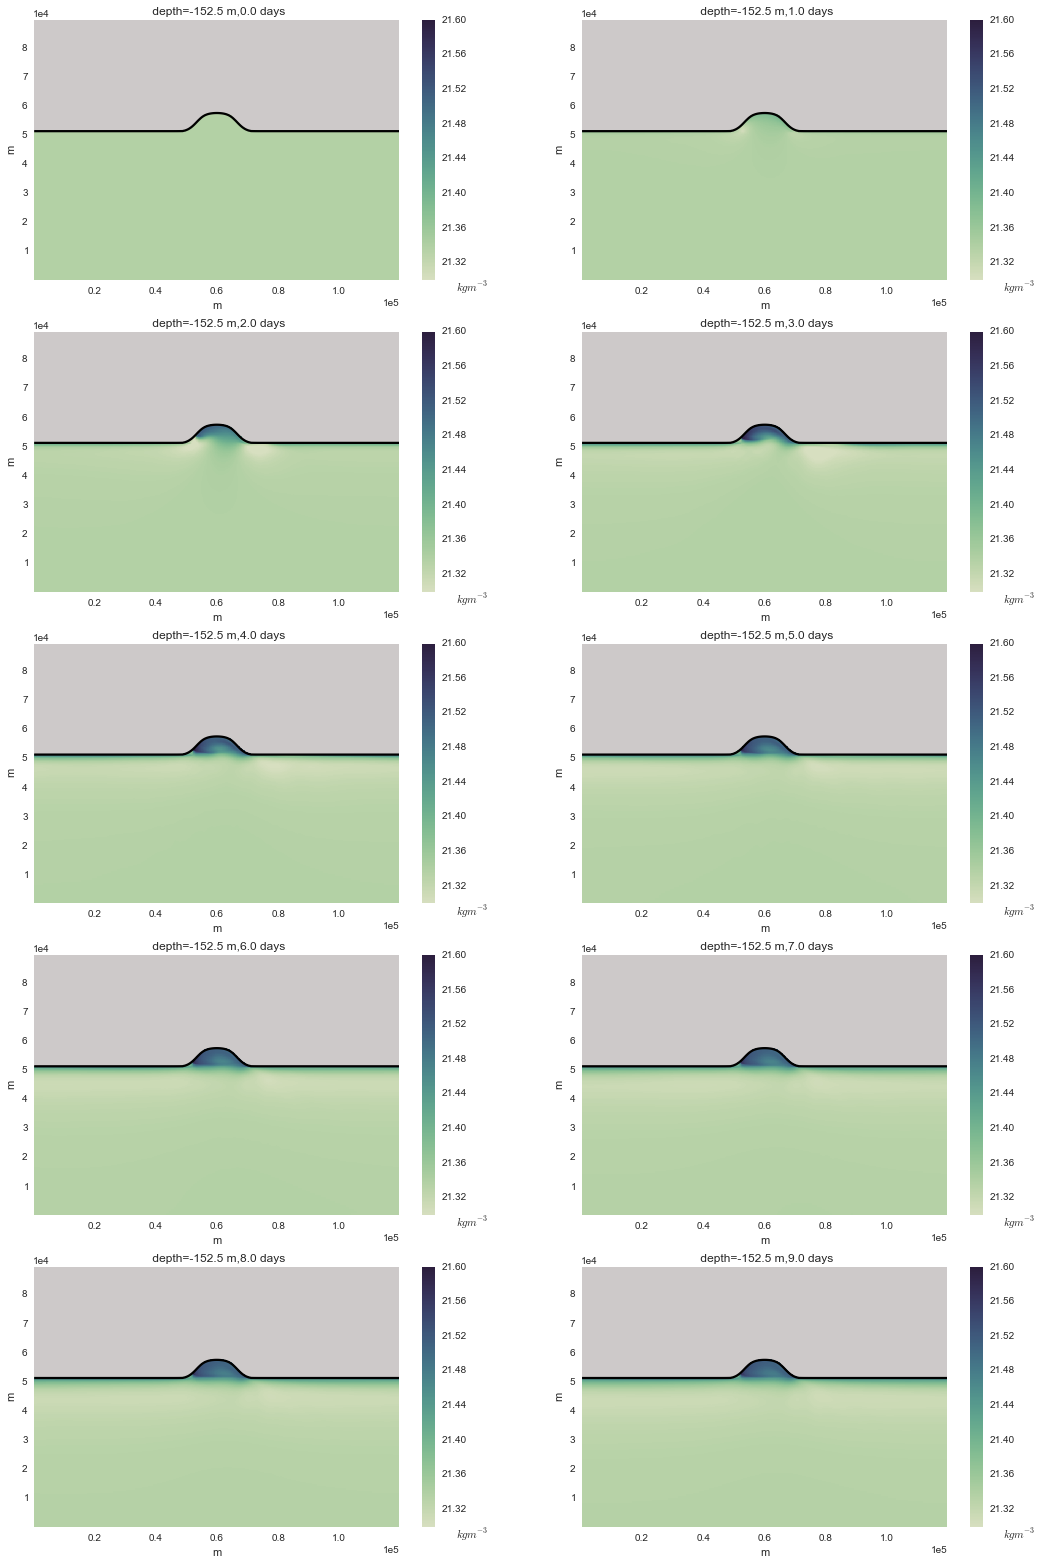

In [55]:
Bs = 7.4E-4
At = 2.0E-4
zlev=30 

fig45=plt.figure(figsize=(18,27))

kk=1

pal = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    plt.pcolor(xc,yc,sigma,cmap=pal)
    
    pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1
    


In [57]:
Tempb = rout.getField(filename1b,'Temp')
Saltb = rout.getField(filename1b,'S')



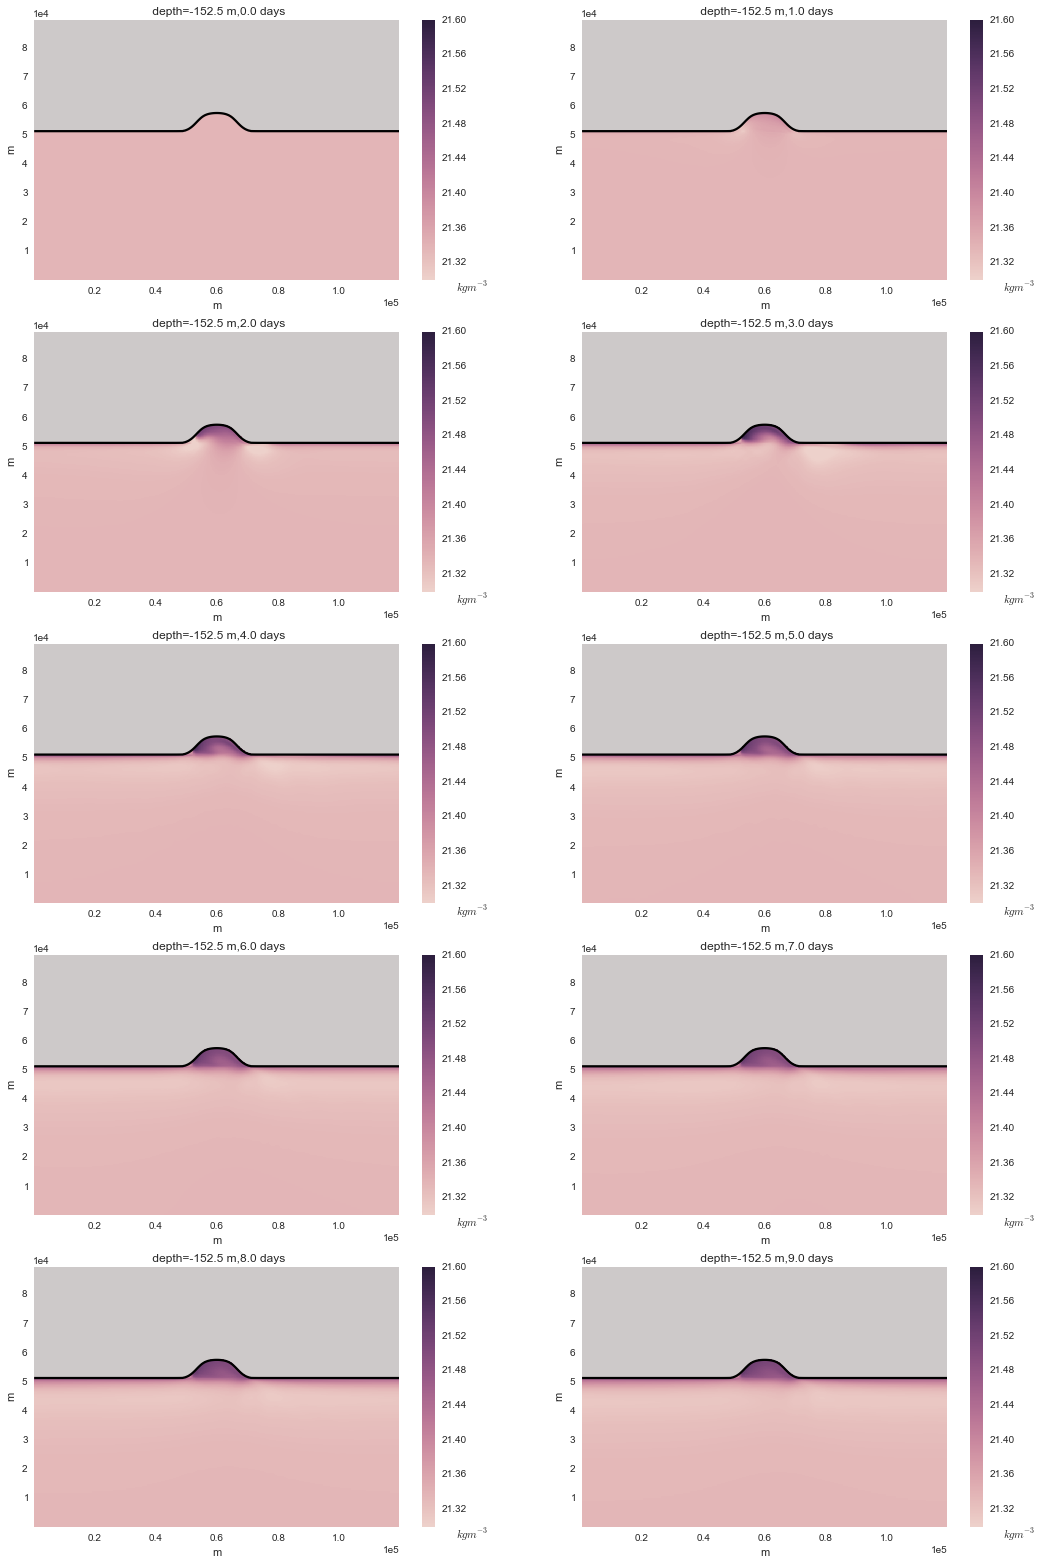

In [58]:
Bs = 7.4E-4
At = 2.0E-4
zlev=30 

fig45=plt.figure(figsize=(18,27))

kk=1

palb = sns.cubehelix_palette(8,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    plt.pcolor(xc,yc,sigmab,cmap=palb)
    
    pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1
    


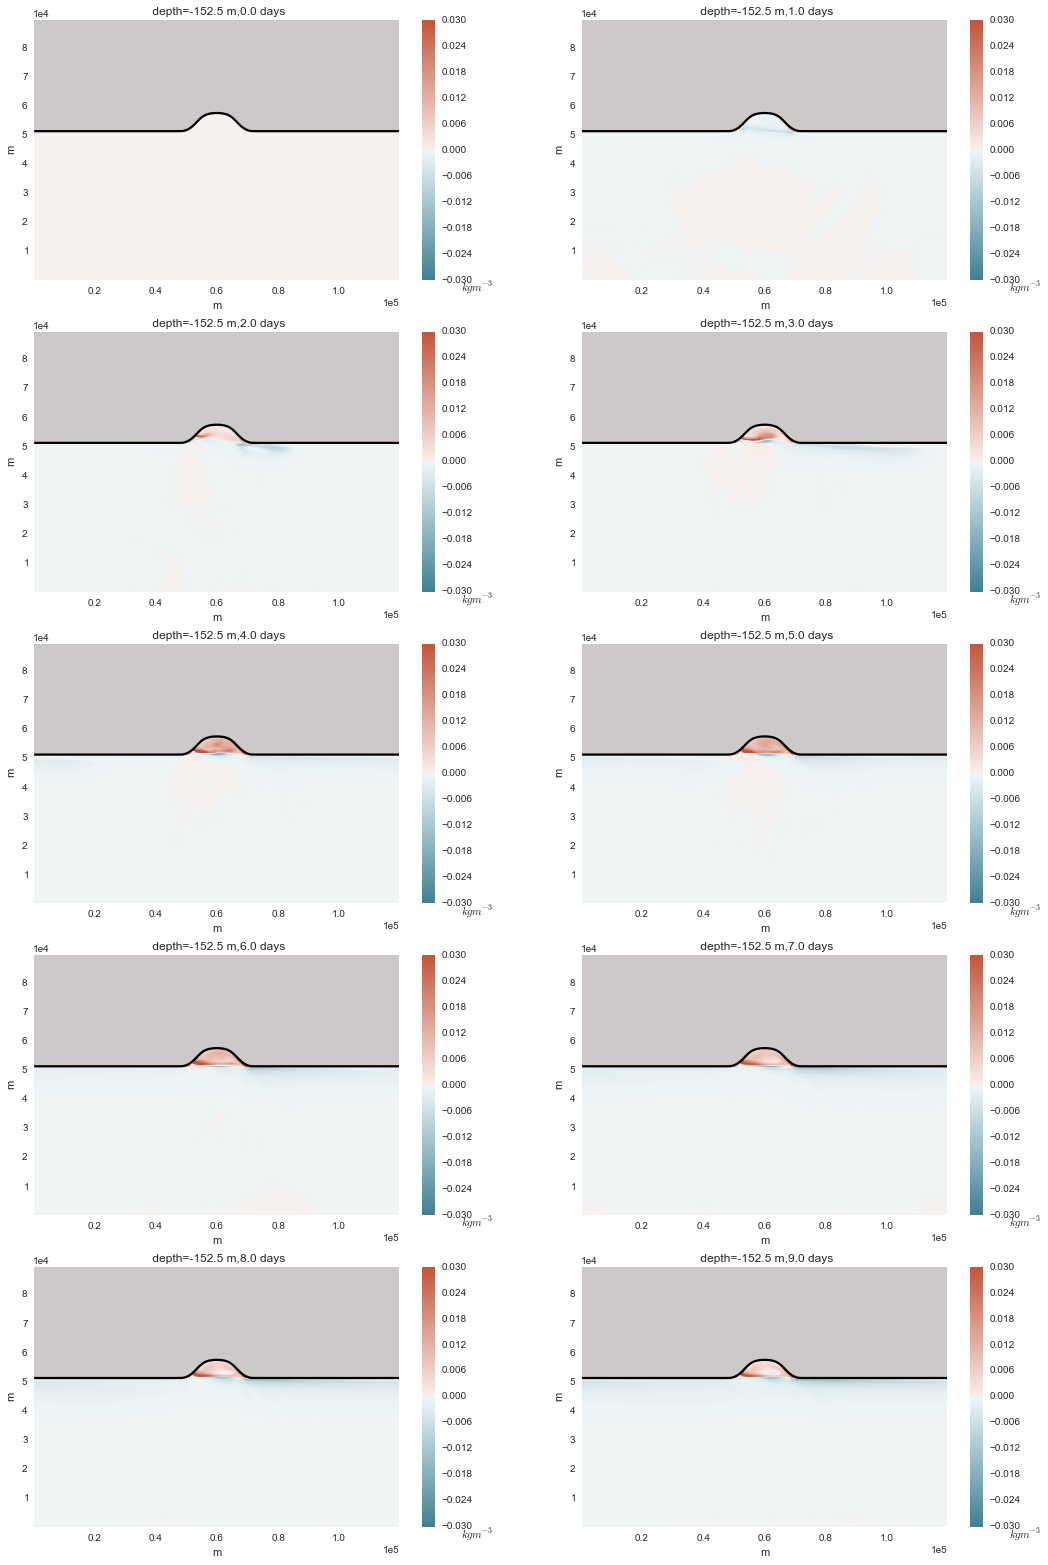

In [69]:
Bs = 7.4E-4
At = 2.0E-4
zlev=30 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    
    plt.pcolor(xc,yc,sigma-sigmab,vmax=0.03,vmin=-0.03,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1
    


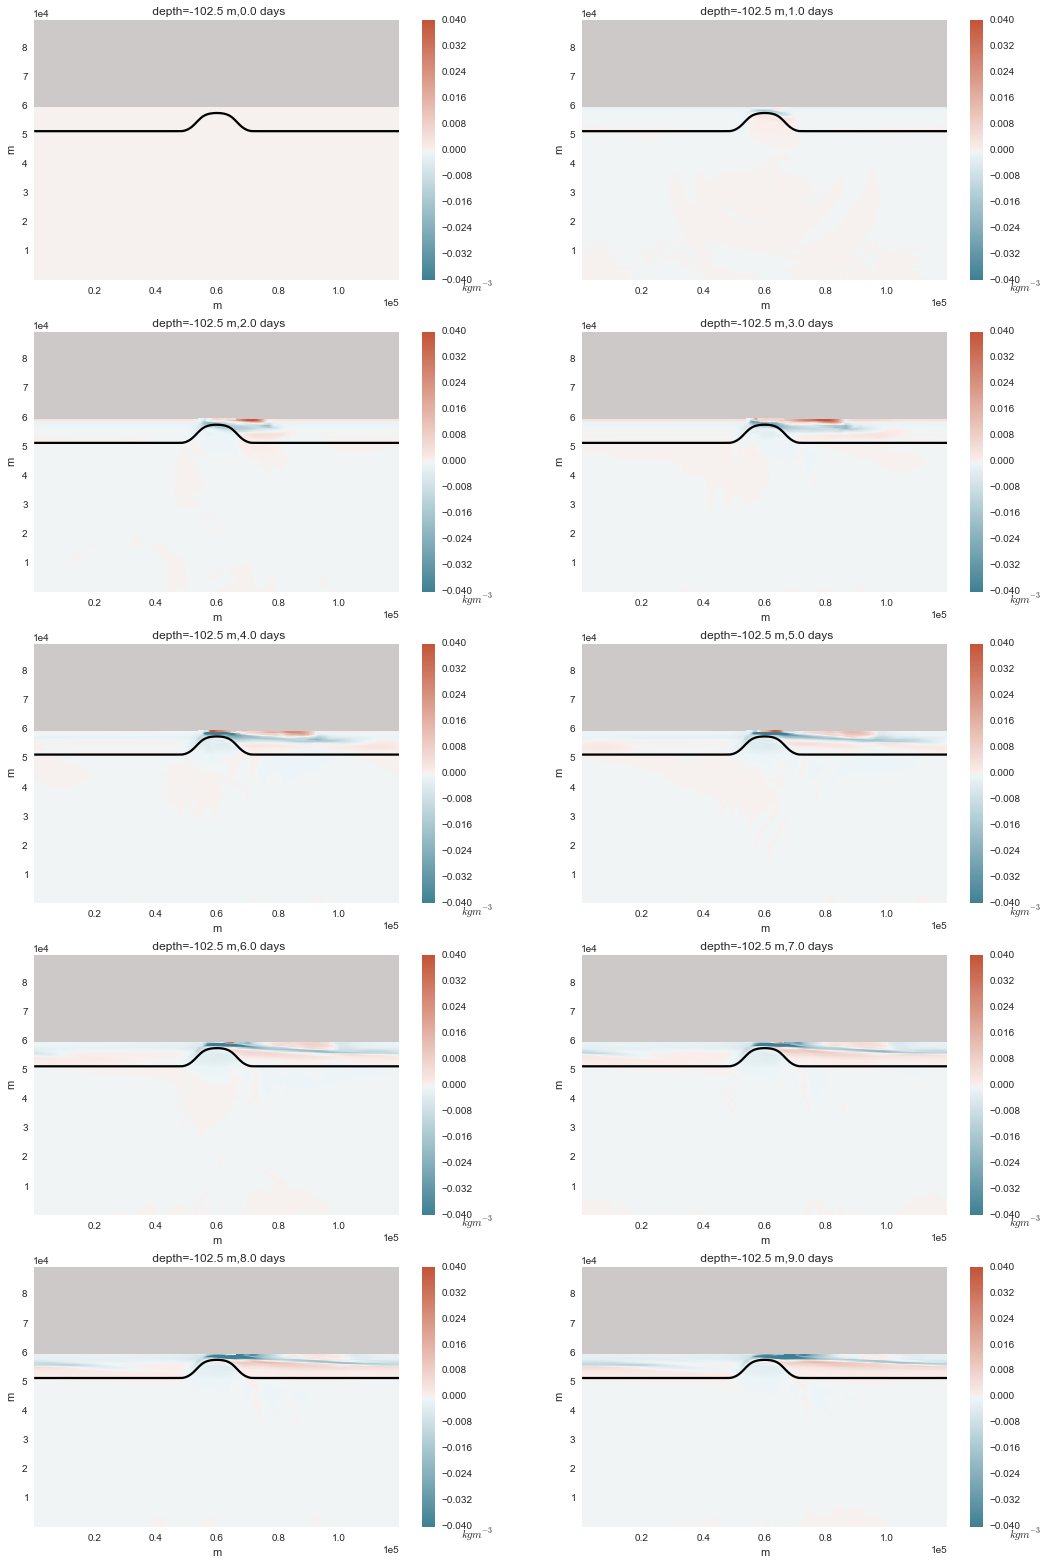

In [72]:
Bs = 7.4E-4
At = 2.0E-4
zlev=20 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    
    plt.pcolor(xc,yc,sigma-sigmab,vmax=0.04,vmin=-0.04,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

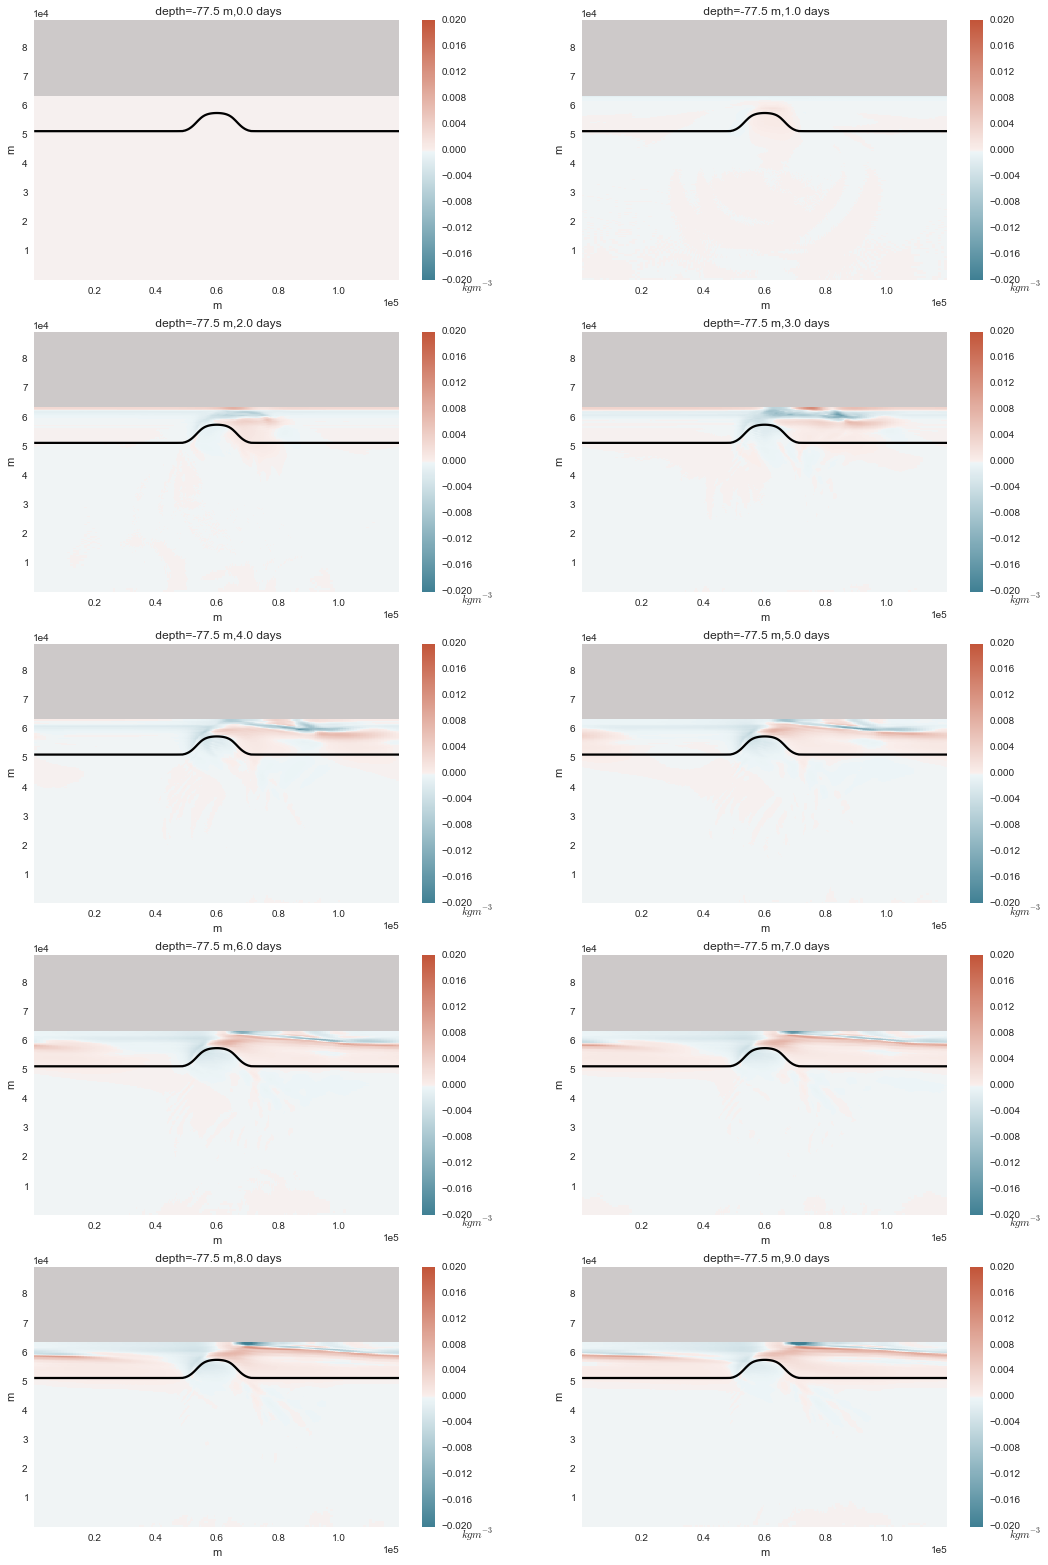

In [75]:
Bs = 7.4E-4
At = 2.0E-4
zlev=15 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    
    plt.pcolor(xc,yc,sigma-sigmab,vmax=0.02,vmin=-0.02,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

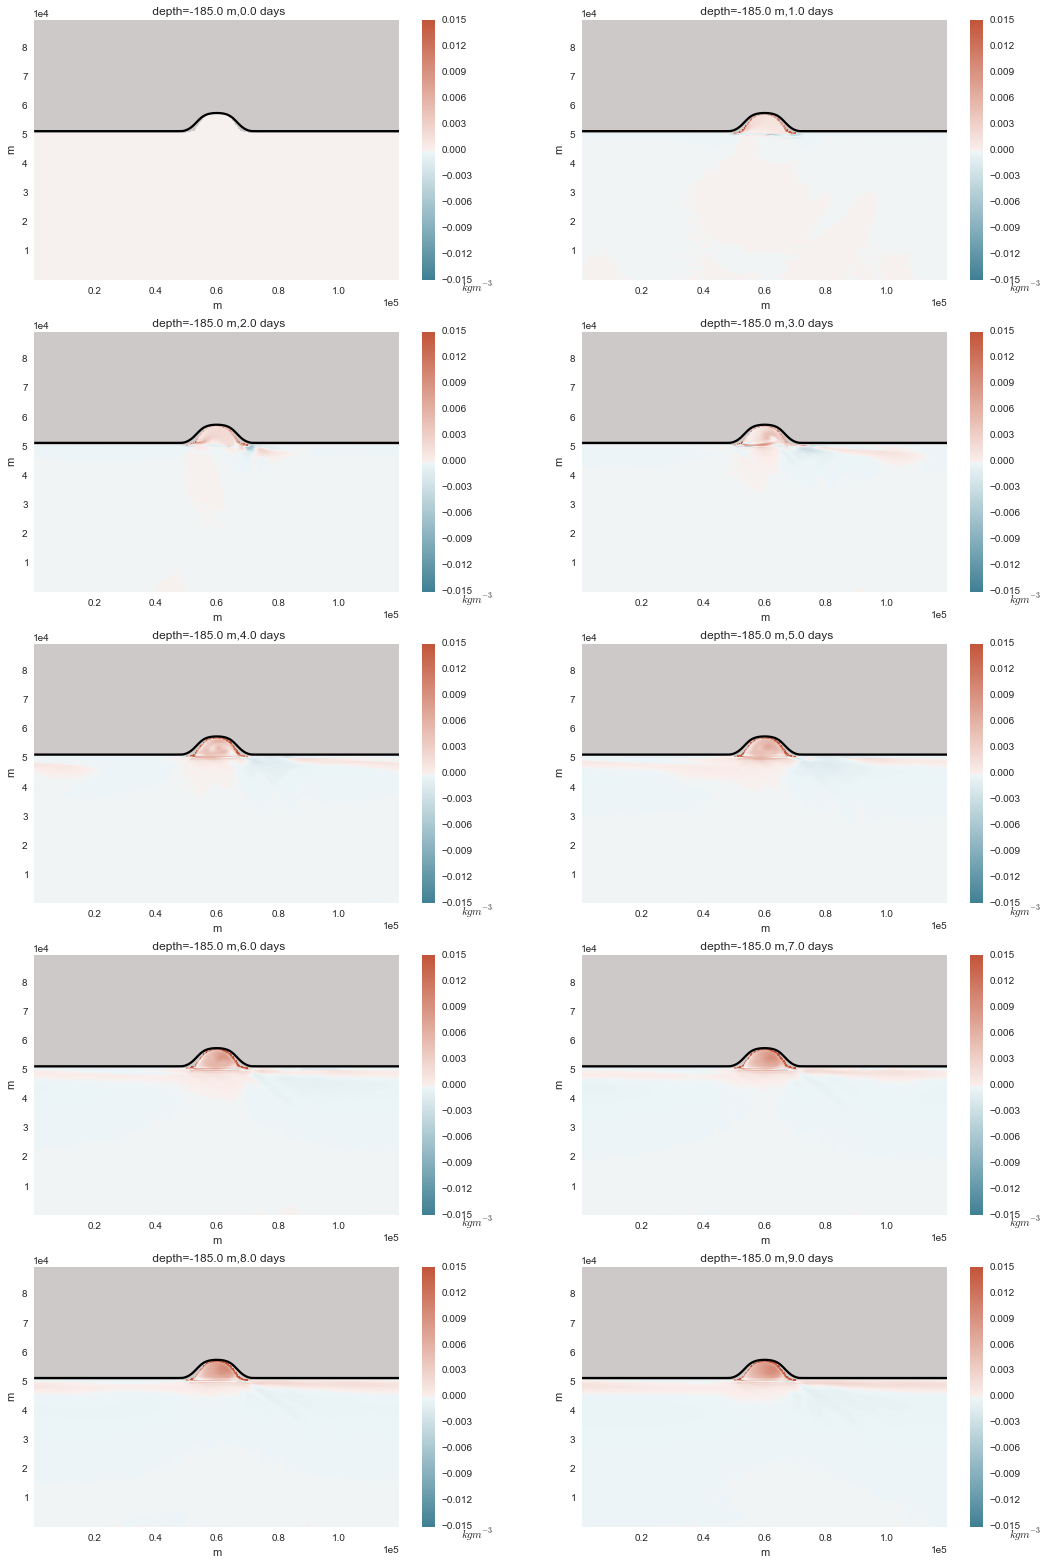

In [77]:
Bs = 7.4E-4
At = 2.0E-4
zlev=35 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    
    plt.pcolor(xc,yc,sigma-sigmab,vmax=0.015,vmin=-0.015,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

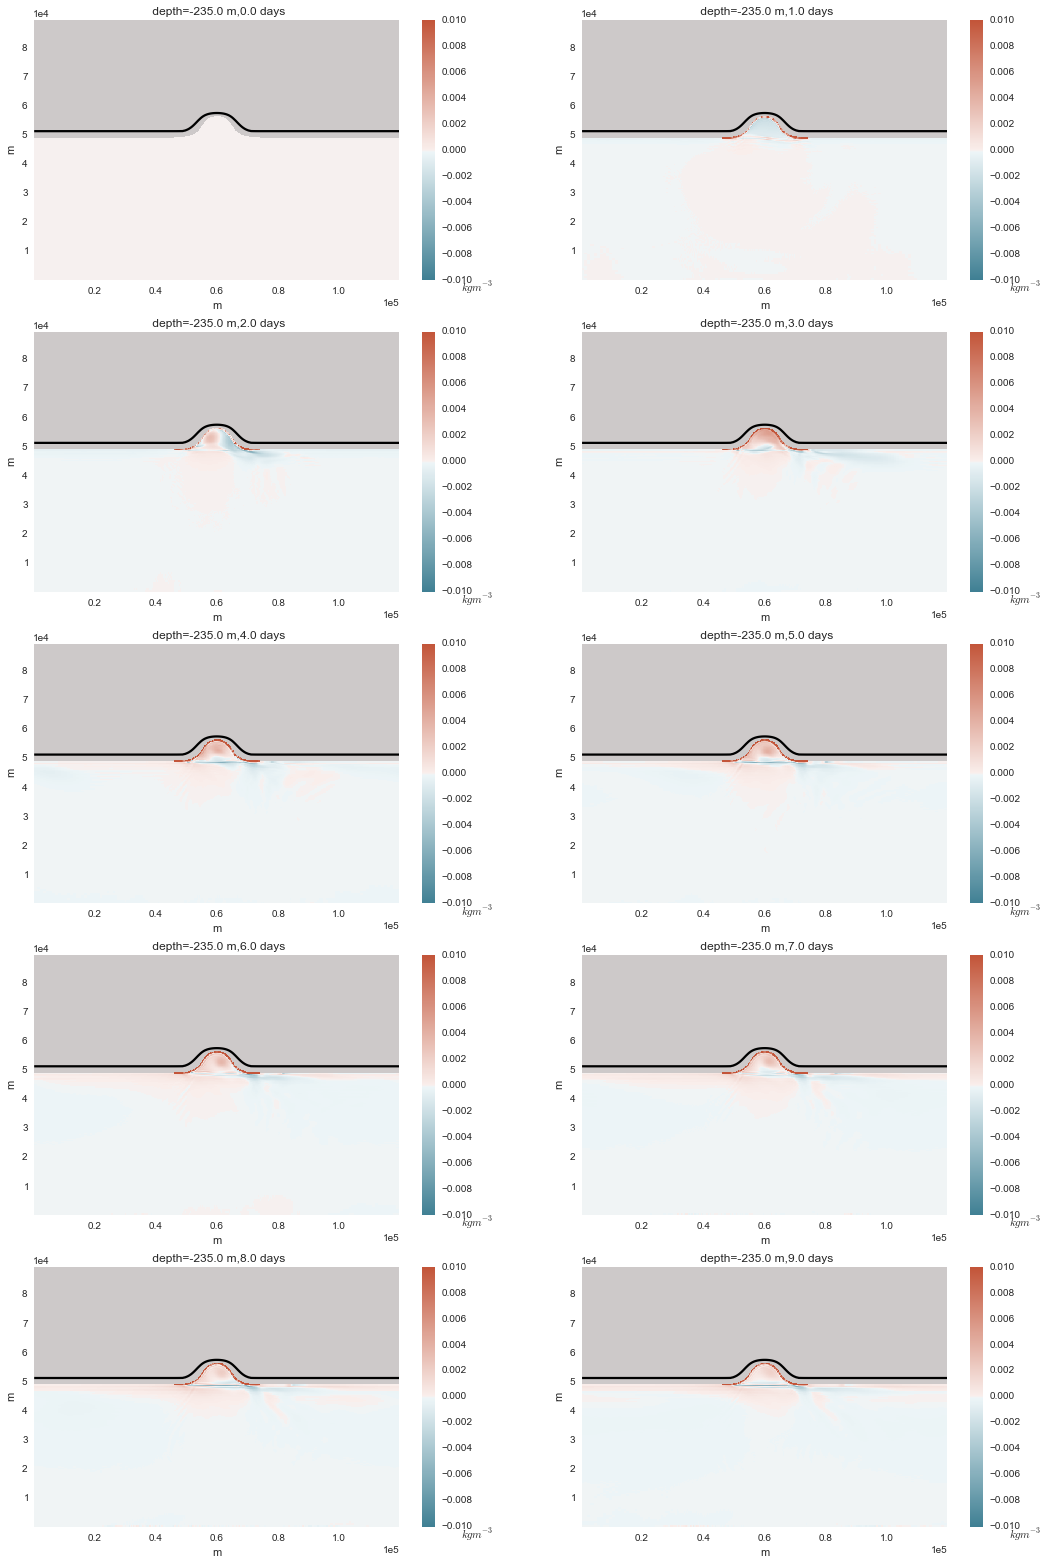

In [79]:
Bs = 7.4E-4
At = 2.0E-4
zlev=40 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaskb=np.ma.array(Tempb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaskb=np.ma.array(Saltb[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigmab = RhoRefb[zlev]*(Bs*SaltMaskb - At*TempMaskb)
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    SaltMaska=np.ma.array(Salta[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    sigma = RhoRefa[zlev]*(Bs*SaltMaska - At*TempMaska)
    
    plt.pcolor(xc,yc,sigma-sigmab,vmax=0.010,vmin=-0.010,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

In [82]:
Tr1CNT = rout.getField(filename3a,'Tr1')
Tr2CNT = rout.getField(filename3a,'Tr2')
Tr13D = rout.getField(filename3b,'Tr1')


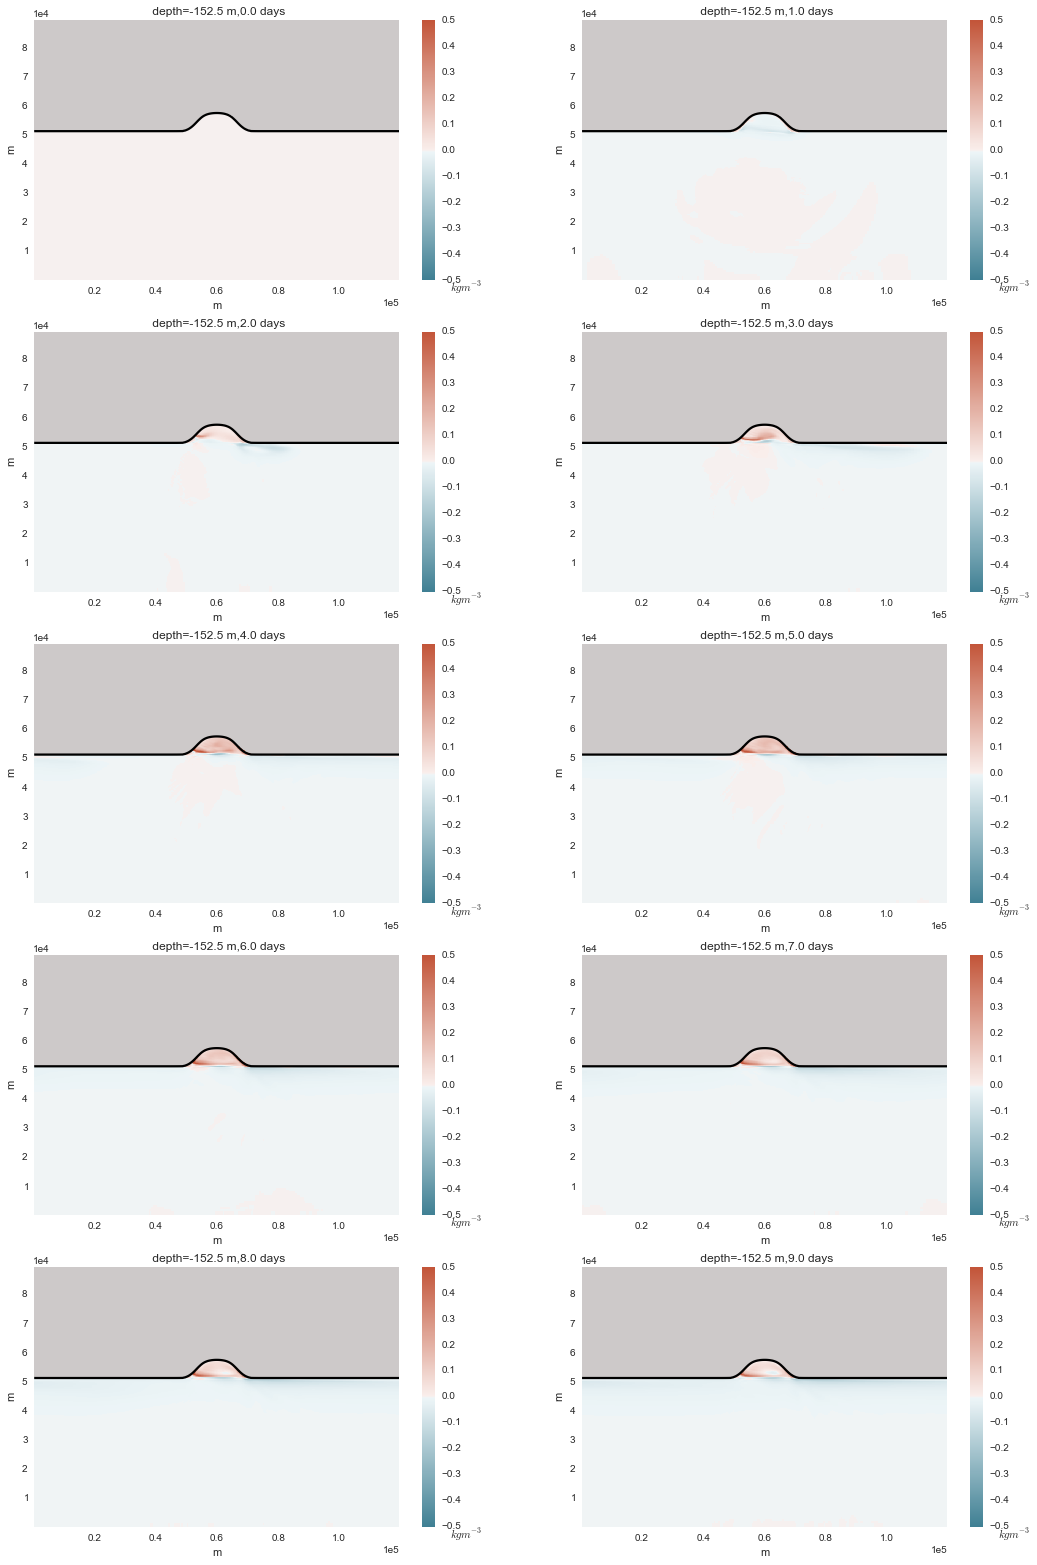

In [85]:

Bs = 7.4E-4
At = 2.0E-4
zlev=30 

fig45=plt.figure(figsize=(18,27))

kk=1

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    Tr1CNTmask=np.ma.array(Tr1CNT[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    Tr13Dmask=np.ma.array(Tr13D[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    
    plt.pcolor(xc,yc,Tr1CNTmask-Tr13Dmask,vmax=0.5,vmin=-0.5,cmap=paldiv)
    
    #pl.clim([21.30,21.6])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label(r'$kg m^{-3}$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

52100.0


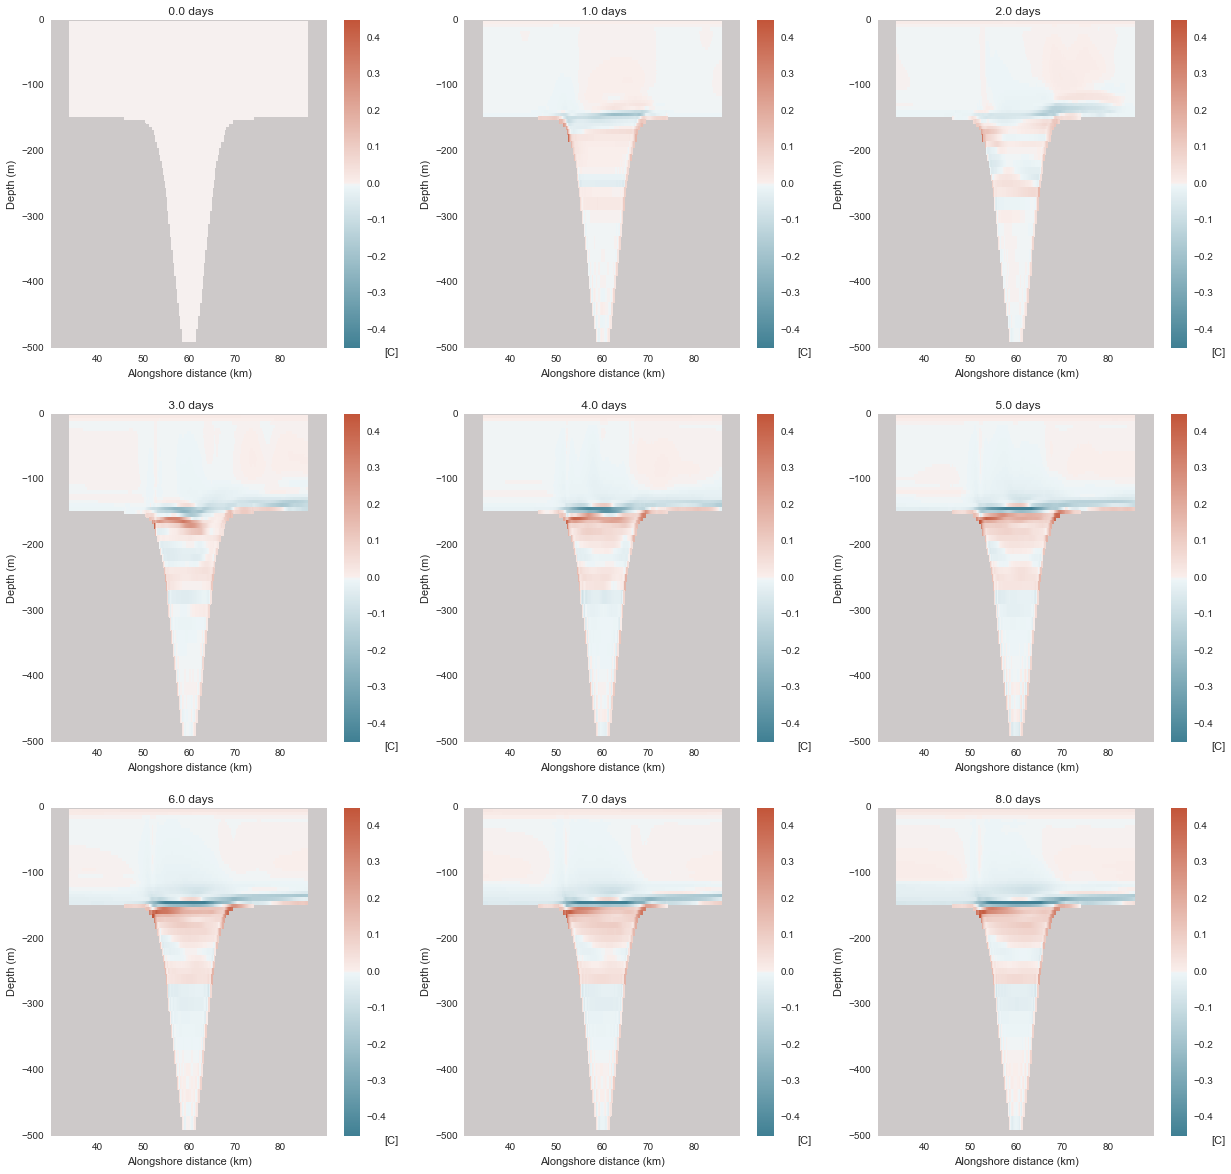

In [233]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))
paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(-0.5,0.5,0.05)
        CS=plt.pcolor(xc[200,50:-50],z[:-35],Tr1CNTmask[:-35,200,50:-50]-Tr13Dmask[:-35,200,50:-50],vmin = -0.45,vmax=0.45,cmap=paldiv)
        cb = plt.colorbar()
        #plt.clim([9, 14])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


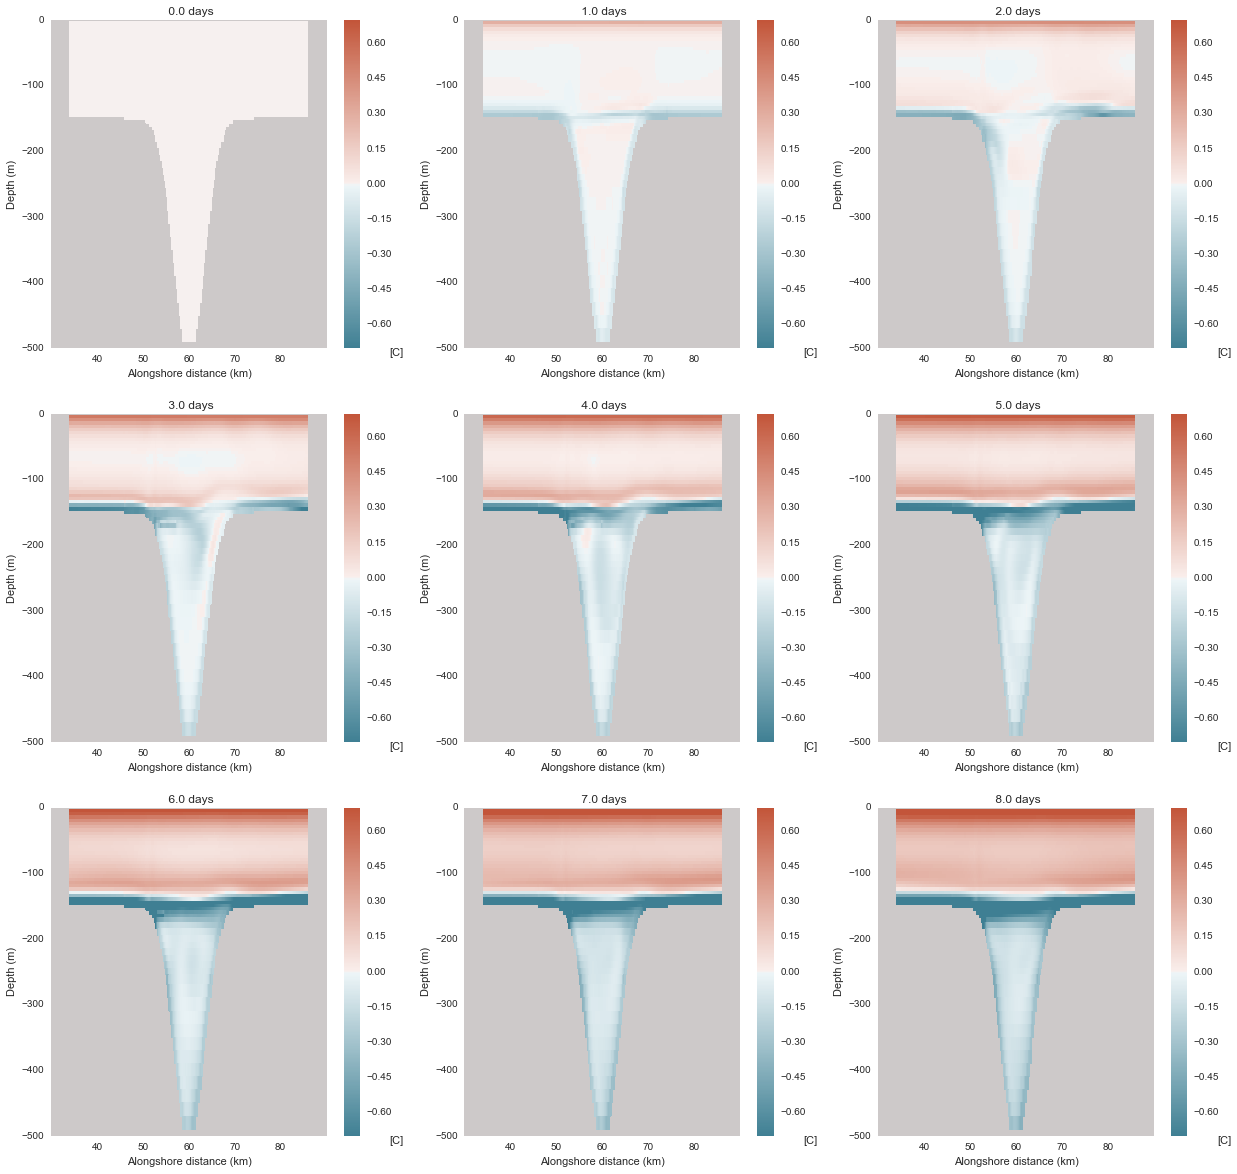

In [234]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))
paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(-0.5,0.5,0.05)
        CS=plt.pcolor(xc[200,50:-50],z[:-35],Tr2CNTmask[:-35,200,50:-50]-Tr13Dmask[:-35,200,50:-50],vmin = -0.7,vmax=0.7,cmap=paldiv)
        cb = plt.colorbar()
        #plt.clim([9, 14])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


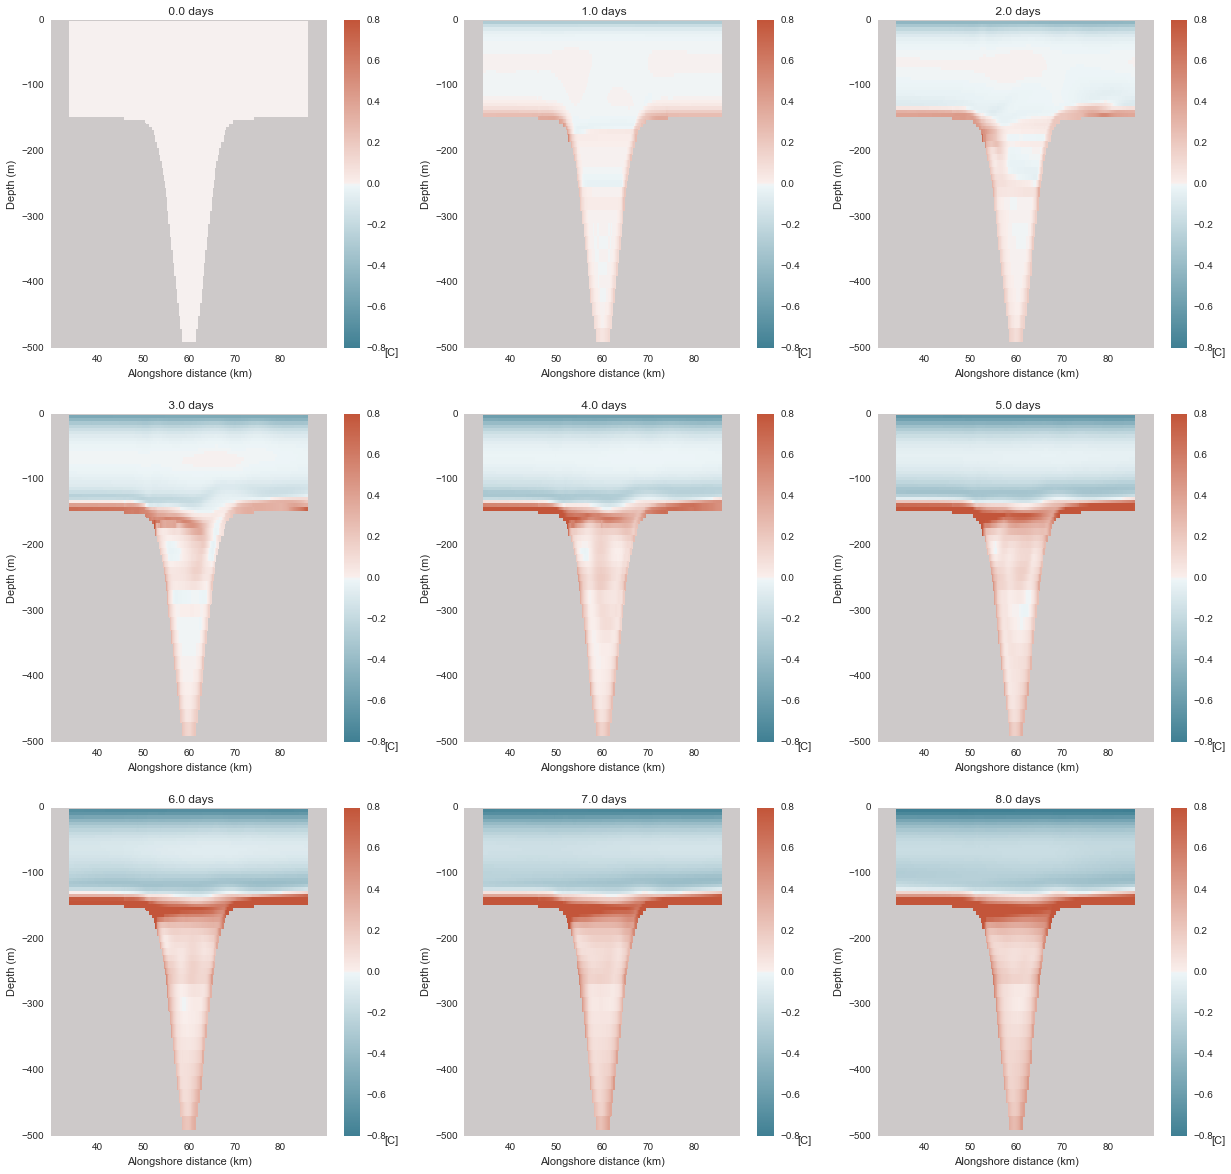

In [235]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))
paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(-0.5,0.5,0.05)
        CS=plt.pcolor(xc[200,50:-50],z[:-35],Tr1CNTmask[:-35,200,50:-50]-Tr2CNTmask[:-35,200,50:-50],vmin = -0.8,vmax=0.8,cmap=paldiv)
        cb = plt.colorbar()
        #plt.clim([9, 14])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


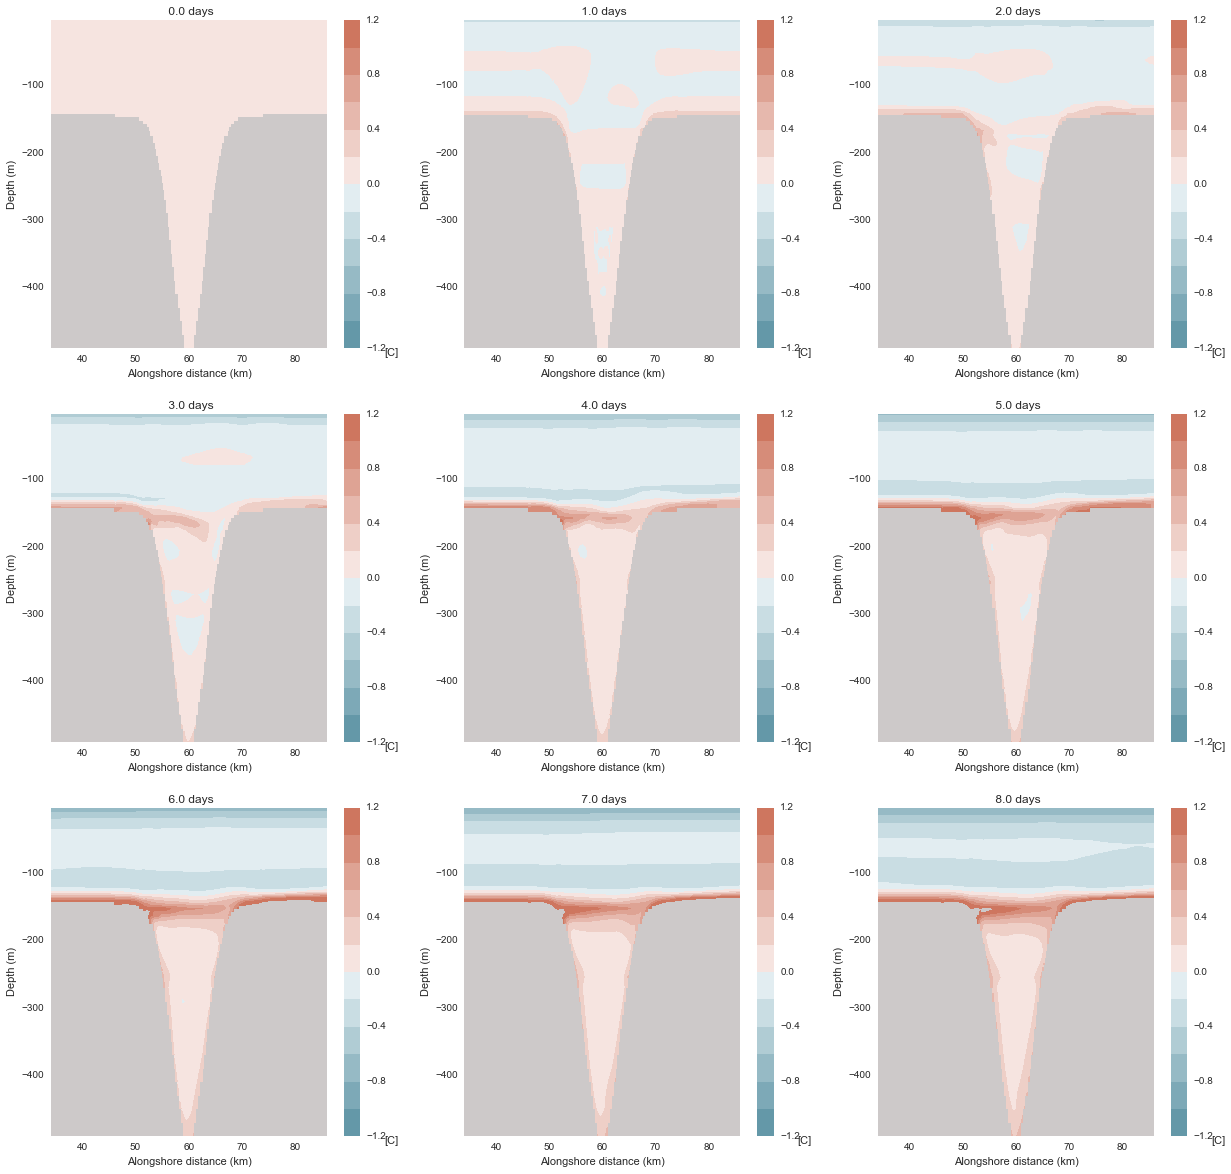

In [236]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))
paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(-1.2,1.4,0.2)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Tr1CNTmask[:-35,200,50:-50]-Tr2CNTmask[:-35,200,50:-50],levels,cmap=paldiv)
        cb = plt.colorbar()
        plt.clim([-1.4, 1.4])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


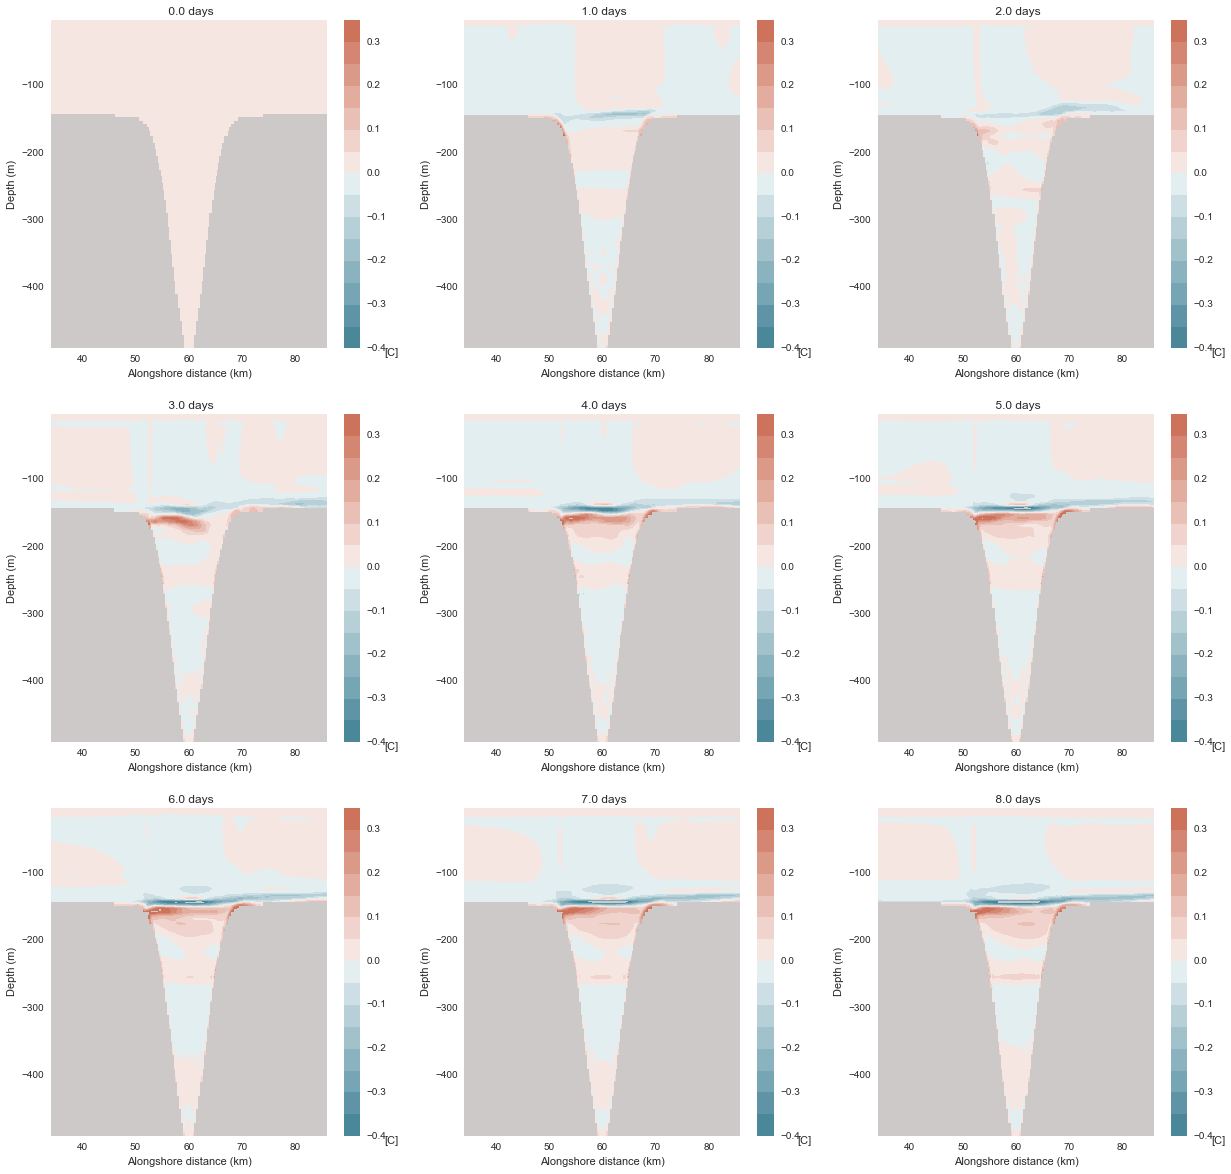

In [237]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(-0.4,0.4,0.05)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Tr1CNTmask[:-35,200,50:-50]-Tr13Dmask[:-35,200,50:-50],levels,cmap=paldiv)
        cb = plt.colorbar()
        plt.clim([-0.4, 0.4])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


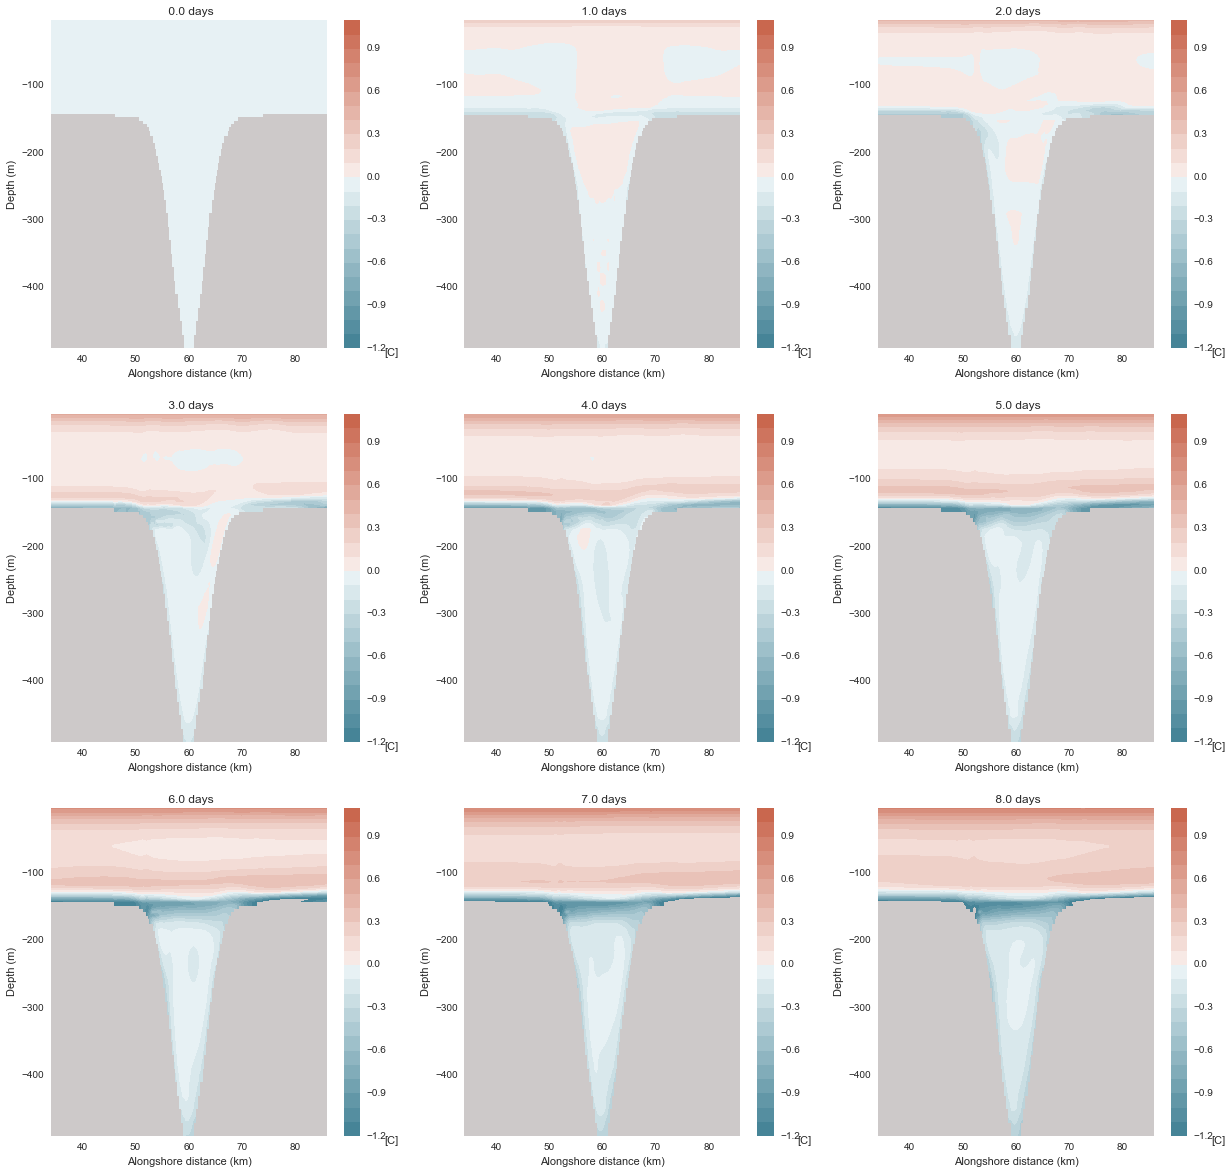

In [238]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

paldiv = sns.diverging_palette(220, 20,sep=1, n=9,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(-1.2,1.2,0.1)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Tr2CNTmask[:-35,200,50:-50]-Tr13Dmask[:-35,200,50:-50],levels,cmap=paldiv)
        cb = plt.colorbar()
        plt.clim([-1.2, 1.2])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


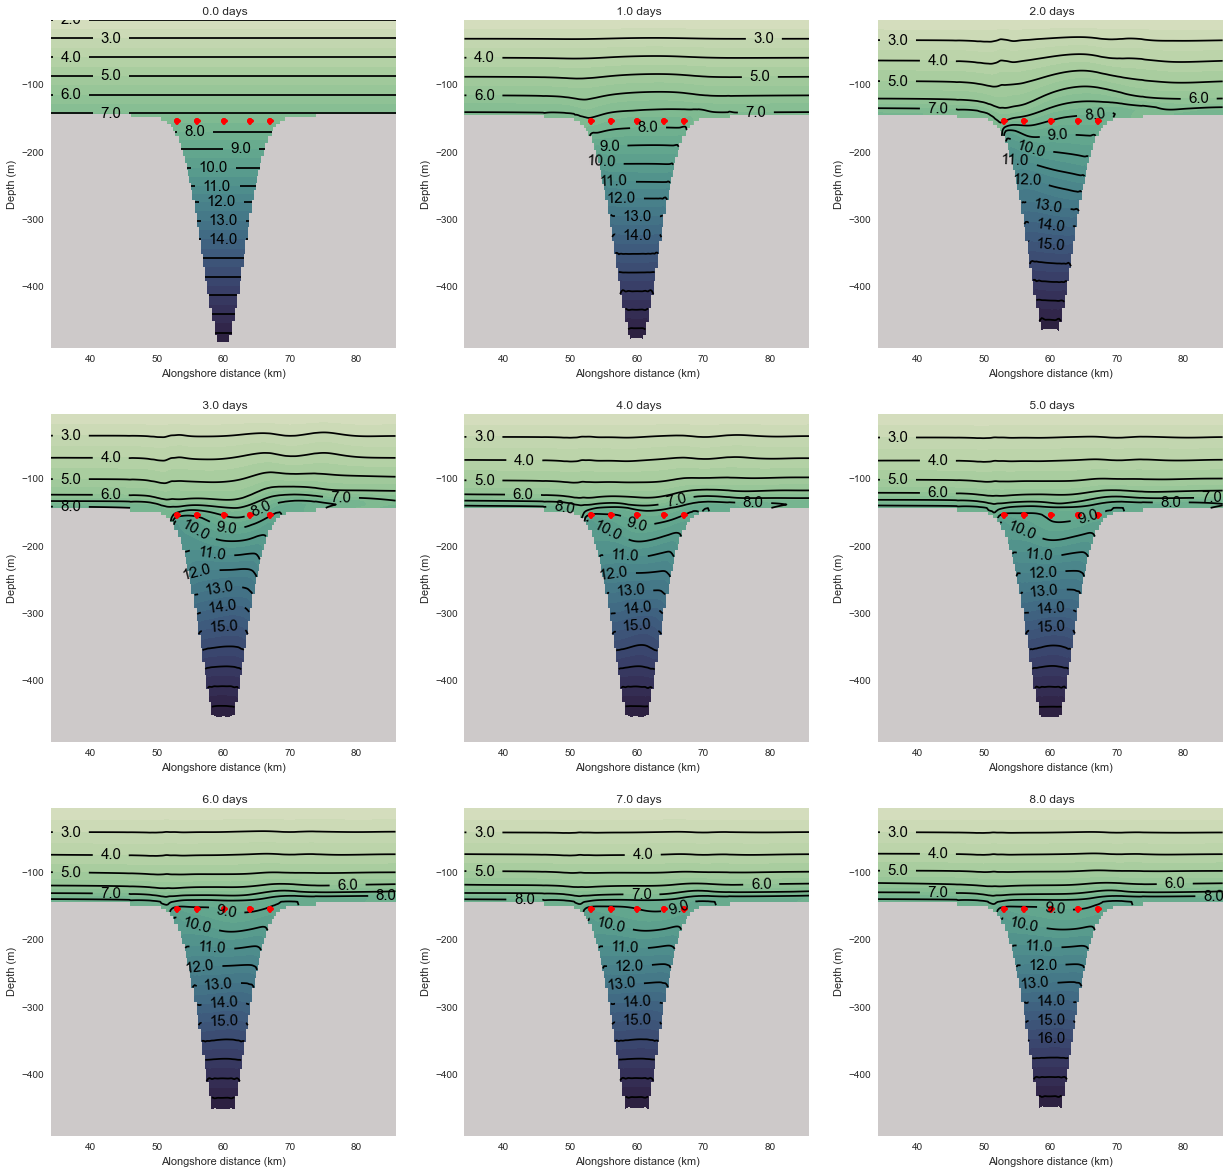

In [239]:
sns.set_style('dark')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

pal = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(2,20,0.5)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Tr13Dmask[:-35,200,50:-50],levels,cmap=pal)
        #cb = plt.colorbar()
        #plt.clim([9, 14])
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k')
        
        plt.plot(xc[200,200],z[30],'ro')
        plt.plot(xc[200,160],z[30],'ro')
        plt.plot(xc[200,180],z[30],'ro')
        plt.plot(xc[200,215],z[30],'ro')
        plt.plot(xc[200,145],z[30],'ro')
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


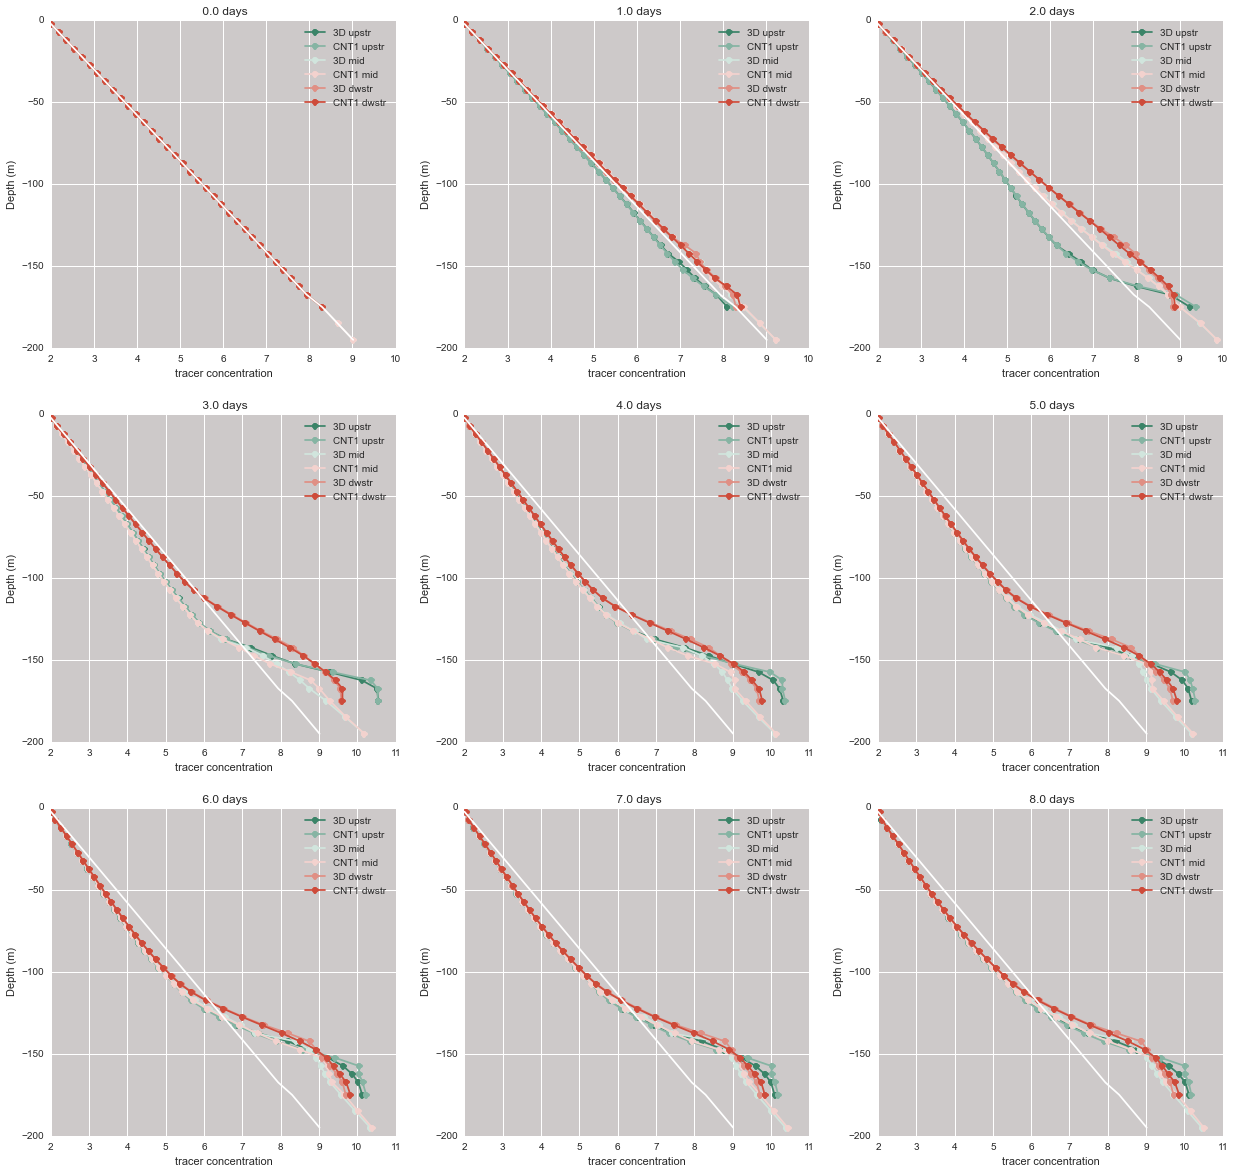

In [231]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr13Dmask[:37,200,145],z[:37],'o-',label='3D upstr')
        plt.plot(Tr1CNTmask[:37,200,145],z[:37],'o-',label='CNT1 upstr')
        
        #plt.plot(Tr13Dmask[:37,200,160],z[:37],'o-',label='3D upmid')
        #plt.plot(Tr1CNTmask[:37,200,160],z[:37],'o-',label='CNT1 upmid')
        
        plt.plot(Tr13Dmask[:37,200,180],z[:37],'o-',label='3D mid')
        plt.plot(Tr1CNTmask[:37,200,180],z[:37],'o-',label='CNT1 mid')
        
        #plt.plot(Tr13Dmask[:37,200,200],z[:37],'o-',label='3D dwmid')
        #plt.plot(Tr1CNTmask[:37,200,200],z[:37],'o-',label='CNT1 dwmid')
        
        plt.plot(Tr13Dmask[:37,200,215],z[:37],'o-',label='3D dwstr')
        plt.plot(Tr1CNTmask[:37,200,215],z[:37],'o-',label='CNT1 dwstr')
        
        plt.plot(Tr13Diniprof,z[:37],'-w')




        plt.ylabel('Depth (m)')
        plt.xlabel('tracer concentration')
        
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 



52100.0


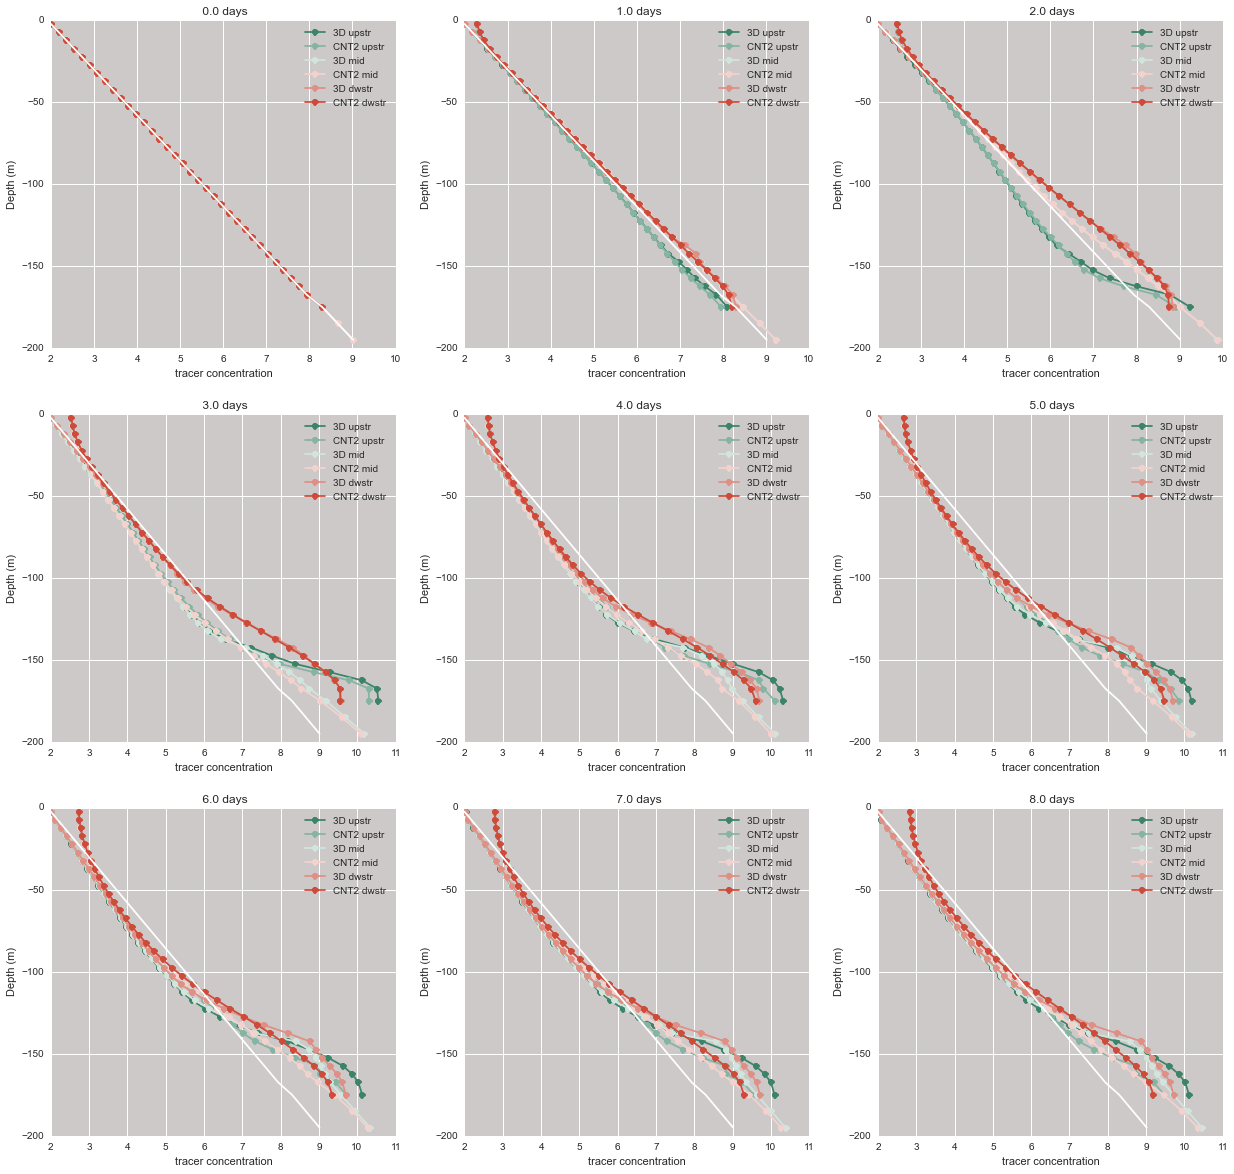

In [230]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr13Dmask[:37,200,145],z[:37],'o-',label='3D upstr')
        plt.plot(Tr2CNTmask[:37,200,145],z[:37],'o-',label='CNT2 upstr')
        
        #plt.plot(Tr13Dmask[:37,200,160],z[:37],'o-',label='3D upmid')
        #plt.plot(Tr2CNTmask[:37,200,160],z[:37],'o-',label='CNT2 upmid')
        
        plt.plot(Tr13Dmask[:37,200,180],z[:37],'o-',label='3D mid')
        plt.plot(Tr2CNTmask[:37,200,180],z[:37],'o-',label='CNT2 mid')
        
        #plt.plot(Tr13Dmask[:37,200,200],z[:37],'o-',label='3D dwmid')
        #plt.plot(Tr2CNTmask[:37,200,200],z[:37],'o-',label='CNT2 dwmid')
        
        plt.plot(Tr13Dmask[:37,200,215],z[:37],'o-',label='3D dwstr')
        plt.plot(Tr2CNTmask[:37,200,215],z[:37],'o-',label='CNT2 dwstr')
        
        plt.plot(Tr13Diniprof,z[:37],'-w')




        plt.ylabel('Depth (m)')
        plt.xlabel('tracer concentration')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 



52100.0


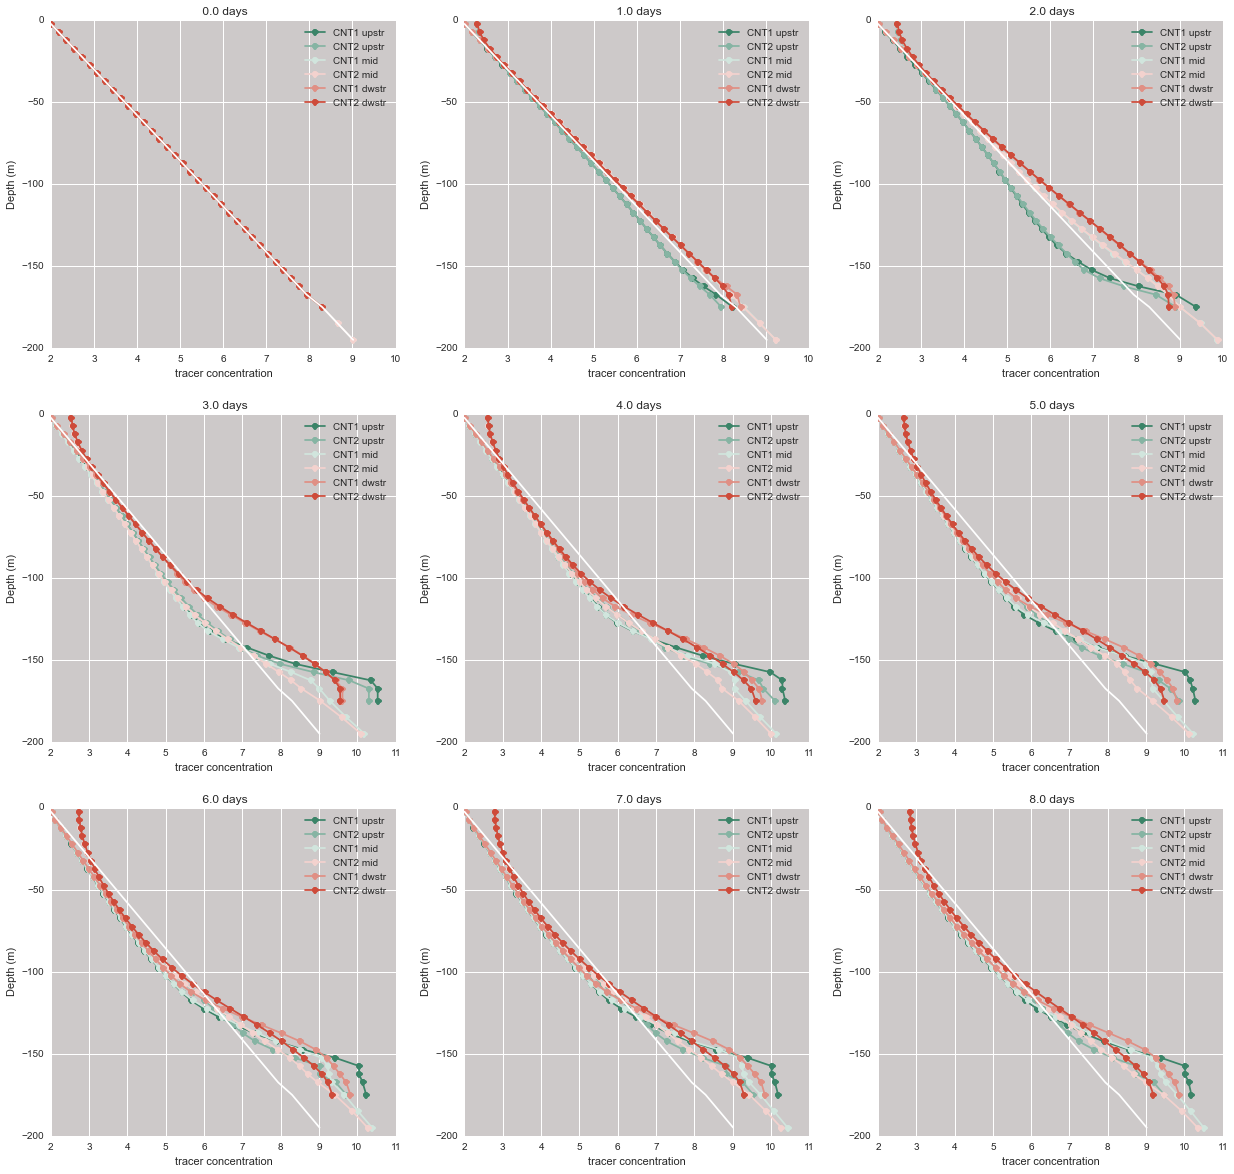

In [229]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr1CNTmask[:37,200,145],z[:37],'o-',label='CNT1 upstr')
        plt.plot(Tr2CNTmask[:37,200,145],z[:37],'o-',label='CNT2 upstr')
        
        #plt.plot(Tr1CNTmask[:37,200,160],z[:37],'o-',label='CNT1 upmid')
        #plt.plot(Tr2CNTmask[:37,200,160],z[:37],'o-',label='CNT2 upmid')
        
        plt.plot(Tr1CNTmask[:37,200,180],z[:37],'o-',label='CNT1 mid')
        plt.plot(Tr2CNTmask[:37,200,180],z[:37],'o-',label='CNT2 mid')
        
        #plt.plot(Tr1CNTmask[:37,200,200],z[:37],'o-',label='CNT1 dwmid')
        #plt.plot(Tr2CNTmask[:37,200,200],z[:37],'o-',label='CNT2 dwmid')
        
        plt.plot(Tr1CNTmask[:37,200,215],z[:37],'o-',label='CNT1 dwstr')
        plt.plot(Tr2CNTmask[:37,200,215],z[:37],'o-',label='CNT2 dwstr')
        
        plt.plot(Tr13Diniprof,z[:37],'-w')




        plt.ylabel('Depth (m)')
        plt.xlabel('tracer concentration')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

52100.0


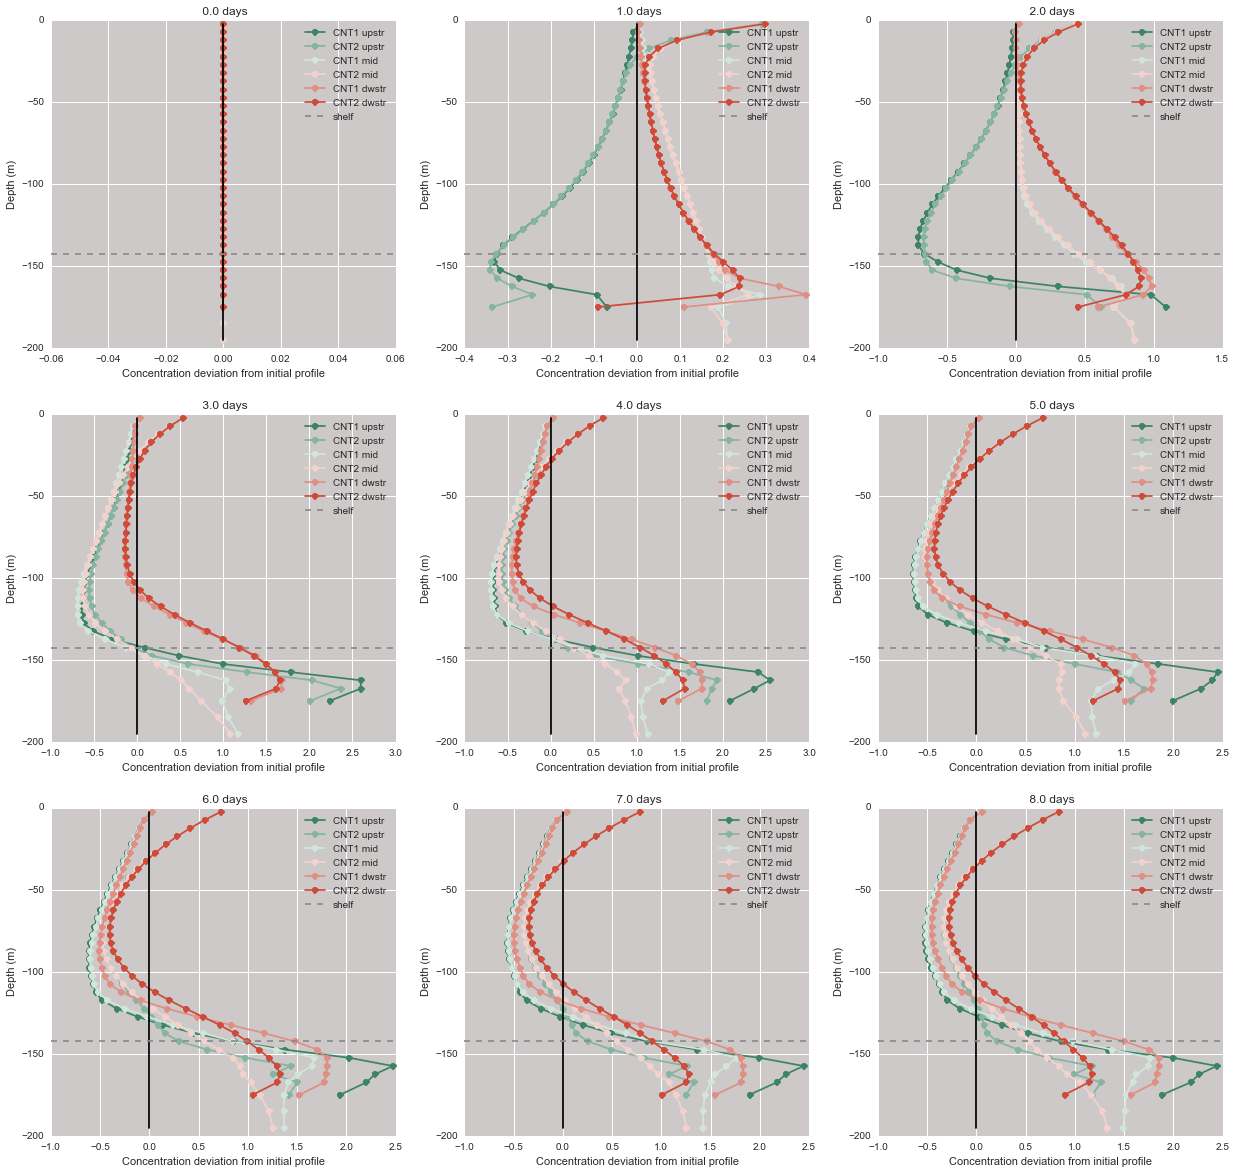

In [228]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr1CNTmask[:37,200,145]-Tr13Diniprof,z[:37],'o-',label='CNT1 upstr')
        plt.plot(Tr2CNTmask[:37,200,145]-Tr13Diniprof,z[:37],'o-',label='CNT2 upstr')
        
        #plt.plot(Tr1CNTmask[:37,200,160]-Tr13Diniprof,z[:37],'o-',label='CNT1 upmid')
        #plt.plot(Tr2CNTmask[:37,200,160]-Tr13Diniprof,z[:37],'o-',label='CNT2 upmid')
        
        plt.plot(Tr1CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mid')
        plt.plot(Tr2CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 mid')
        
        #plt.plot(Tr1CNTmask[:37,200,200]-Tr13Diniprof,z[:37],'o-',label='CNT1 dwmid')
        #plt.plot(Tr2CNTmask[:37,200,200]-Tr13Diniprof,z[:37],'o-',label='CNT2 dwmid')
        
        plt.plot(Tr1CNTmask[:37,200,215]-Tr13Diniprof,z[:37],'o-',label='CNT1 dwstr')
        plt.plot(Tr2CNTmask[:37,200,215]-Tr13Diniprof,z[:37],'o-',label='CNT2 dwstr')
        
        plt.plot(Tr13Diniprof-Tr13Diniprof,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        



        plt.ylabel('Depth (m)')
        plt.xlabel('Concentration deviation from initial profile')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

52100.0


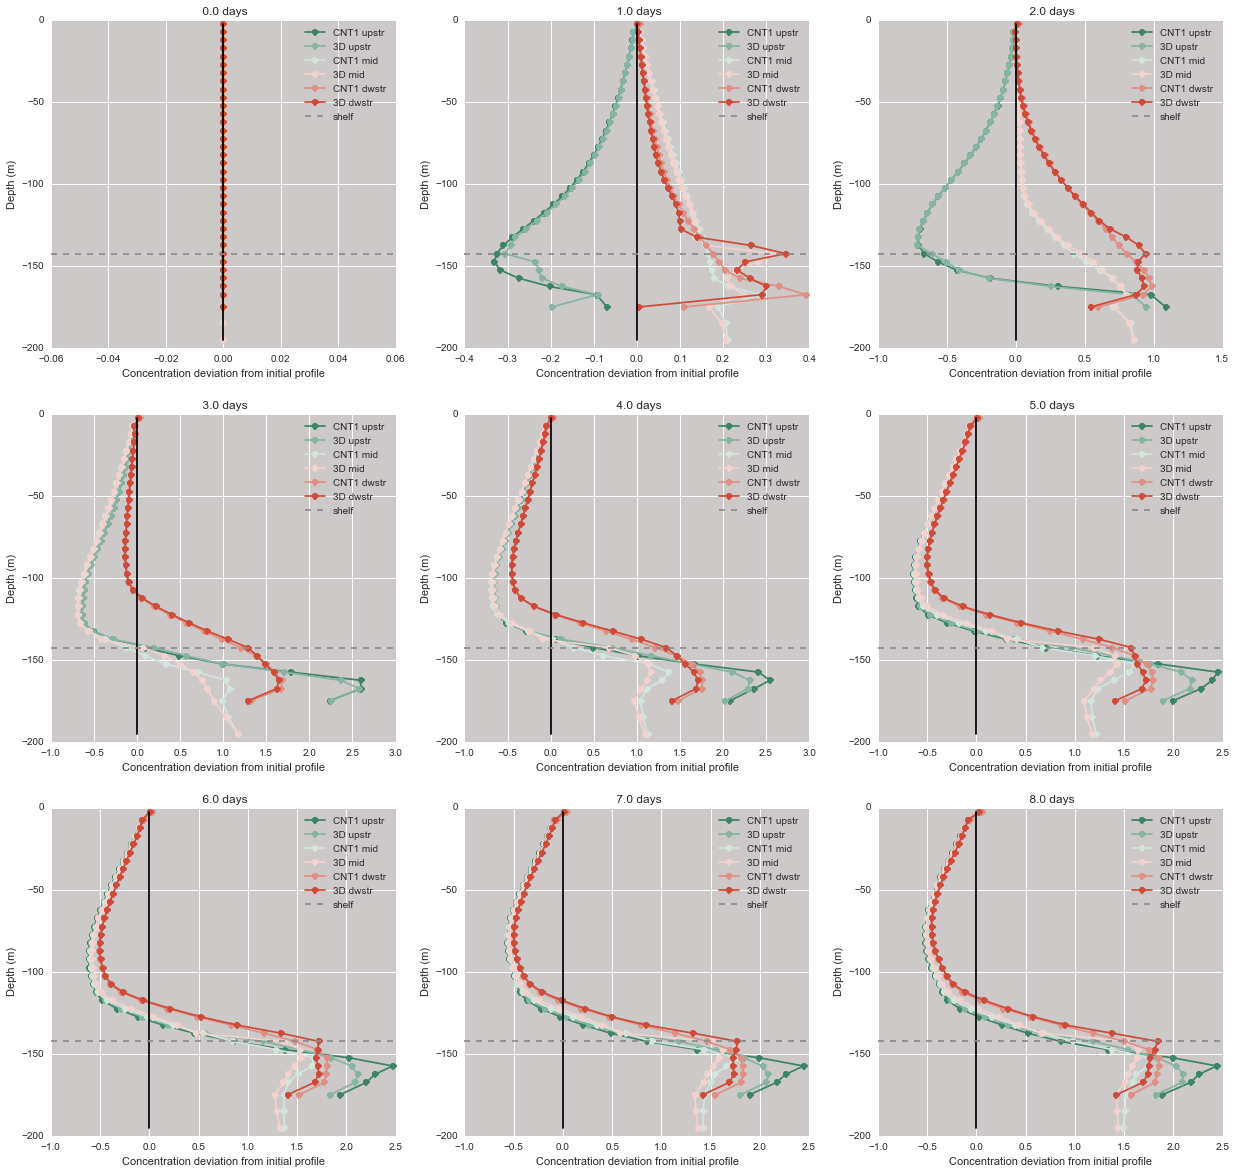

In [227]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr1CNTmask[:37,200,145]-Tr13Diniprof,z[:37],'o-',label='CNT1 upstr')
        plt.plot(Tr13Dmask[:37,200,145]-Tr13Diniprof,z[:37],'o-',label='3D upstr')
        
        #plt.plot(Tr1CNTmask[:37,200,160]-Tr13Diniprof,z[:37],'o-',label='CNT1 upmid')
        #plt.plot(Tr13Dmask[:37,200,160]-Tr13Diniprof,z[:37],'o-',label='3D upmid')
        
        plt.plot(Tr1CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mid')
        plt.plot(Tr13Dmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='3D mid')
        
        #plt.plot(Tr1CNTmask[:37,200,200]-Tr13Diniprof,z[:37],'o-',label='CNT1 dwmid')
        #plt.plot(Tr13Dmask[:37,200,200]-Tr13Diniprof,z[:37],'o-',label='3D dwmid')
        
        plt.plot(Tr1CNTmask[:37,200,215]-Tr13Diniprof,z[:37],'o-',label='CNT1 dwstr')
        plt.plot(Tr13Dmask[:37,200,215]-Tr13Diniprof,z[:37],'o-',label='3D dwstr')
        
        plt.plot(Tr13Diniprof-Tr13Diniprof,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        plt.ylabel('Depth (m)')
        plt.xlabel('Concentration deviation from initial profile')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

52100.0


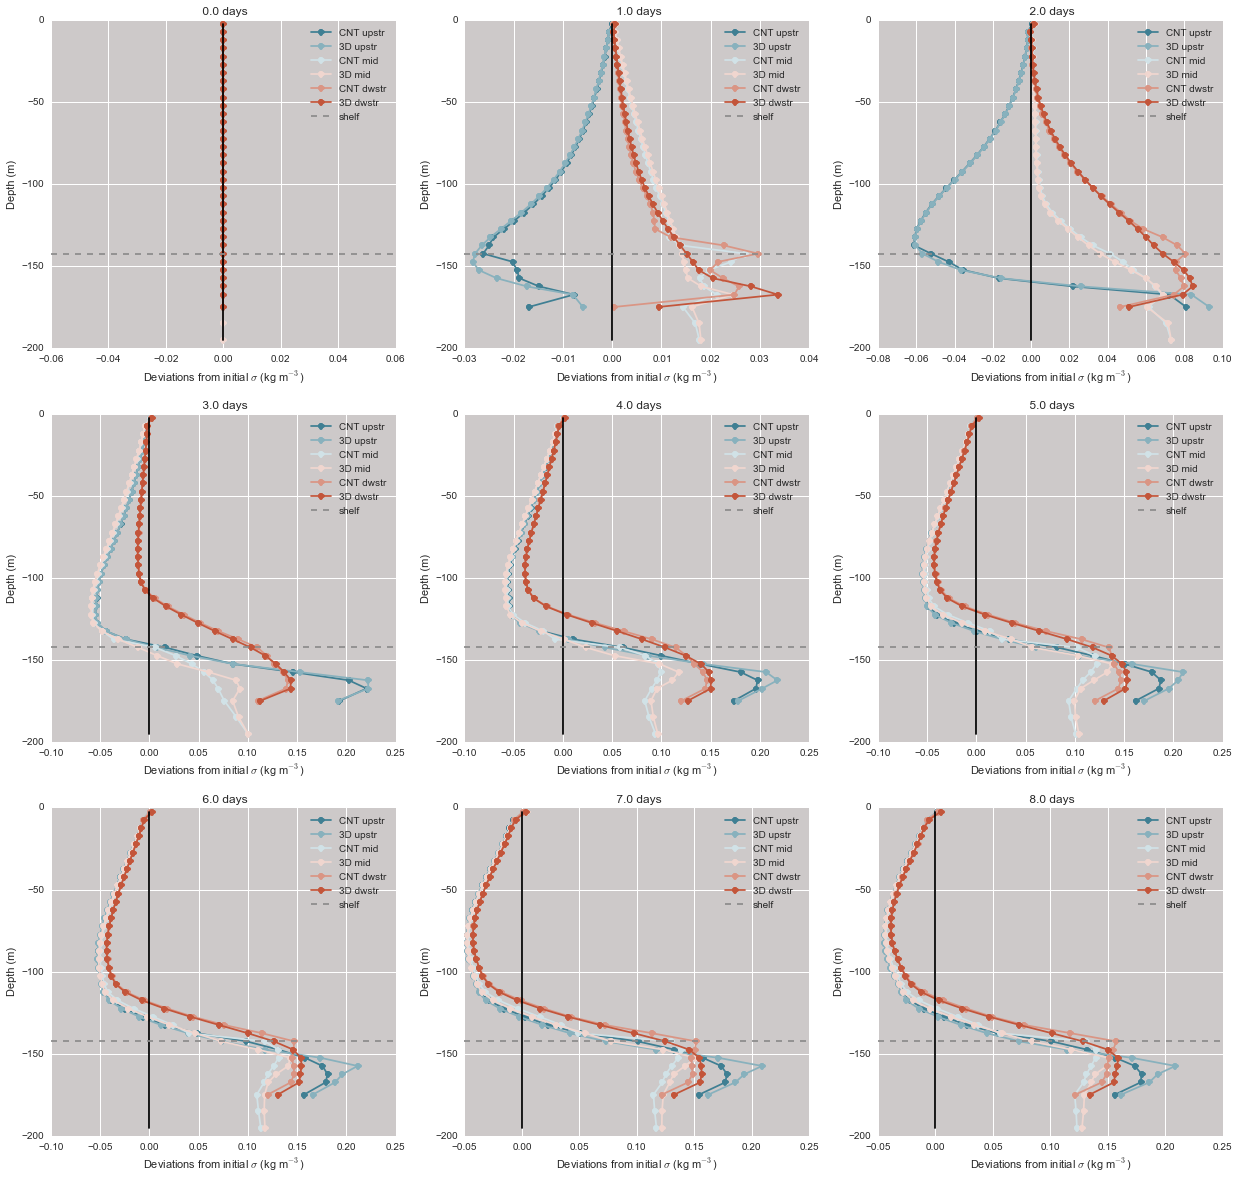

In [217]:

    
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

TempMaskb=np.ma.array(Tempb[0,:37,200,180],mask=MaskC[:37,200,180])
SaltMaskb=np.ma.array(Saltb[0,:37,200,180],mask=MaskC[:37,200,180])
sigmaIni = RhoRefb[:37]*(Bs*SaltMaskb - At*TempMaskb )
        

with sns.diverging_palette(220, 20, n=6, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskb=np.ma.array(Tempb[tt,:,:,:],mask=MaskC[:,:,:])
        SaltMaskb=np.ma.array(Saltb[tt,:,:,:],mask=MaskC[:,:,:])
        TempMaska=np.ma.array(Tempa[tt,:,:,:],mask=MaskC[:,:,:])
        SaltMaska=np.ma.array(Salta[tt,:,:,:],mask=MaskC[:,:,:])
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,145] - At*TempMaskb[:,200,145] )
        plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT upstr')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,145] - At*TempMaska[:,200,145] )
        plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D upstr')
        
        #sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,160] - At*TempMaskb[:,200,160] )
        #plt.plot(sigmab[:37]-RhoRefb[:37],z[:37],'o-',label='CNT upmid')
        #sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,160] - At*TempMaska[:,200,160] )
        #plt.plot(sigmaa[:37]-RhoRefa[:37],z[:37],'o-',label='3D upmid')
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,180] - At*TempMaskb[:,200,180] )
        plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT mid')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,180] - At*TempMaska[:,200,180] )
        plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D mid')
        
        #sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,200] - At*TempMaskb[:,200,200] )
        #plt.plot(sigmab[:37]-RhoRefb[:37],z[:37],'o-',label='CNT dwmid')
        #sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,200] - At*TempMaska[:,200,200] )
        #plt.plot(sigmaa[:37]-RhoRefa[:37],z[:37],'o-',label='3D dwmid')
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,215] - At*TempMaskb[:,200,215] )
        plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT dwstr')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,215] - At*TempMaska[:,200,215] )
        plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D dwstr')
        
        plt.plot(sigmaIni-sigmaIni,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        plt.ylabel('Depth (m)')
        plt.xlabel('Deviations from initial $\sigma$ (kg m$^{-3}$)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

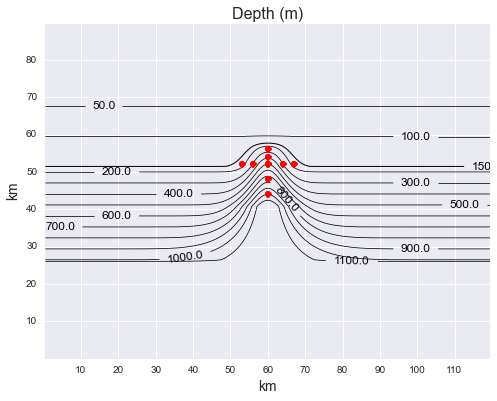

In [218]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

### across canyon profiles ###
plt.plot(xc[200,200],yc[200,200],'ro')
plt.plot(xc[200,160],yc[200,160],'ro')
plt.plot(xc[200,180],yc[200,180],'ro')
plt.plot(xc[200,215],yc[200,215],'ro')
plt.plot(xc[200,145],yc[200,145],'ro')
        
### along canyon profiles ###
plt.plot(xc[200,180],yc[200,180],'ro')
plt.plot(xc[210,180],yc[210,180],'ro')
plt.plot(xc[220,180],yc[220,180],'ro')
plt.plot(xc[180,180],yc[180,180],'ro')
plt.plot(xc[160,180],yc[160,180],'ro')

lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)




#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')


52100.0


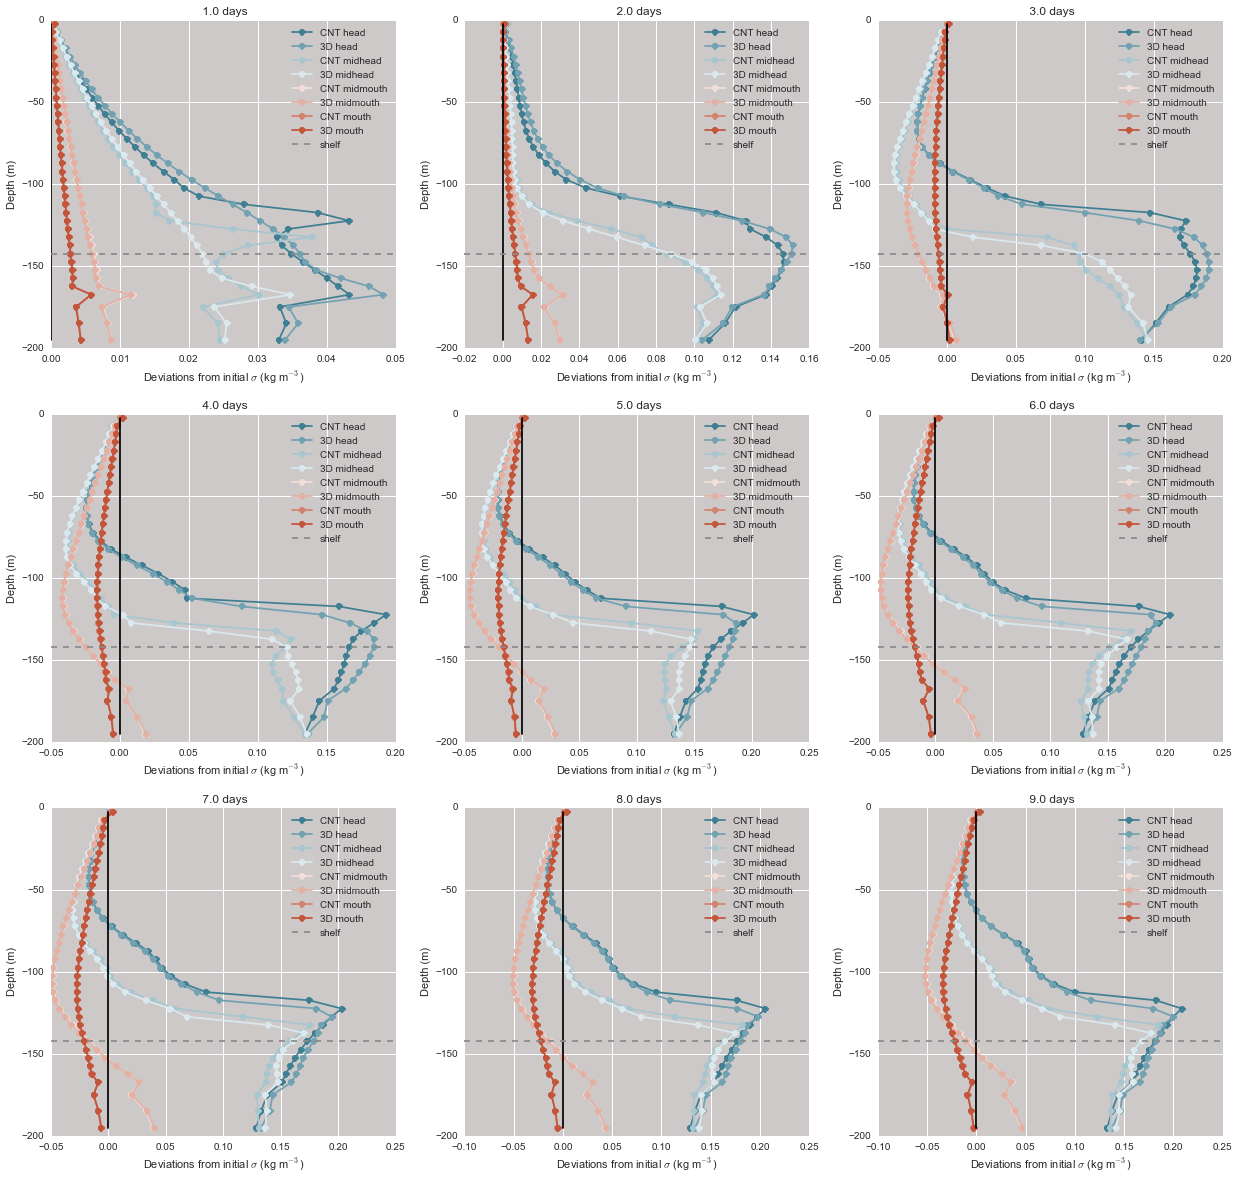

In [223]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

TempMaskb=np.ma.array(Tempb[0,:37,200,180],mask=MaskC[:37,200,180])
SaltMaskb=np.ma.array(Saltb[0,:37,200,180],mask=MaskC[:37,200,180])
sigmaIni = RhoRefb[:37]*(Bs*SaltMaskb - At*TempMaskb )
        

with sns.diverging_palette(220, 20, n=8, center="light") :
    
    for tt in range(2,19,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMaskb=np.ma.array(Tempb[tt,:,:,:],mask=MaskC[:,:,:])
        SaltMaskb=np.ma.array(Saltb[tt,:,:,:],mask=MaskC[:,:,:])
        TempMaska=np.ma.array(Tempa[tt,:,:,:],mask=MaskC[:,:,:])
        SaltMaska=np.ma.array(Salta[tt,:,:,:],mask=MaskC[:,:,:])
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,220,180] - At*TempMaskb[:,220,180] )
        plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT head')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,220,180] - At*TempMaska[:,220,185] )
        plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D head')
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,210,180] - At*TempMaskb[:,210,180] )
        plt.plot(sigmab[:37]-sigmaIni[:37],z[:37],'o-',label='CNT midhead')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,210,180] - At*TempMaska[:,210,180] )
        plt.plot(sigmaa[:37]-sigmaIni[:37],z[:37],'o-',label='3D midhead')
        
        #sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,200,180] - At*TempMaskb[:,200,180] )
        #plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT mid')
        #sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,200,180] - At*TempMaska[:,200,180] )
        #plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D mid')
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,180,180] - At*TempMaskb[:,180,180] )
        plt.plot(sigmab[:37]-sigmaIni[:37],z[:37],'o-',label='CNT midmouth')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,180,180] - At*TempMaska[:,180,180] )
        plt.plot(sigmaa[:37]-sigmaIni[:37],z[:37],'o-',label='3D midmouth')
        
        sigmab = RhoRefb[:]*(Bs*SaltMaskb[:,160,180] - At*TempMaskb[:,160,180] )
        plt.plot(sigmab[:37]-sigmaIni,z[:37],'o-',label='CNT mouth')
        sigmaa = RhoRefa[:]*(Bs*SaltMaska[:,160,180] - At*TempMaska[:,160,180] )
        plt.plot(sigmaa[:37]-sigmaIni,z[:37],'o-',label='3D mouth')
        
        plt.plot(sigmaIni-sigmaIni,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        plt.ylabel('Depth (m)')
        plt.xlabel('Deviations from initial $\sigma$ (kg m$^{-3}$)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

52100.0


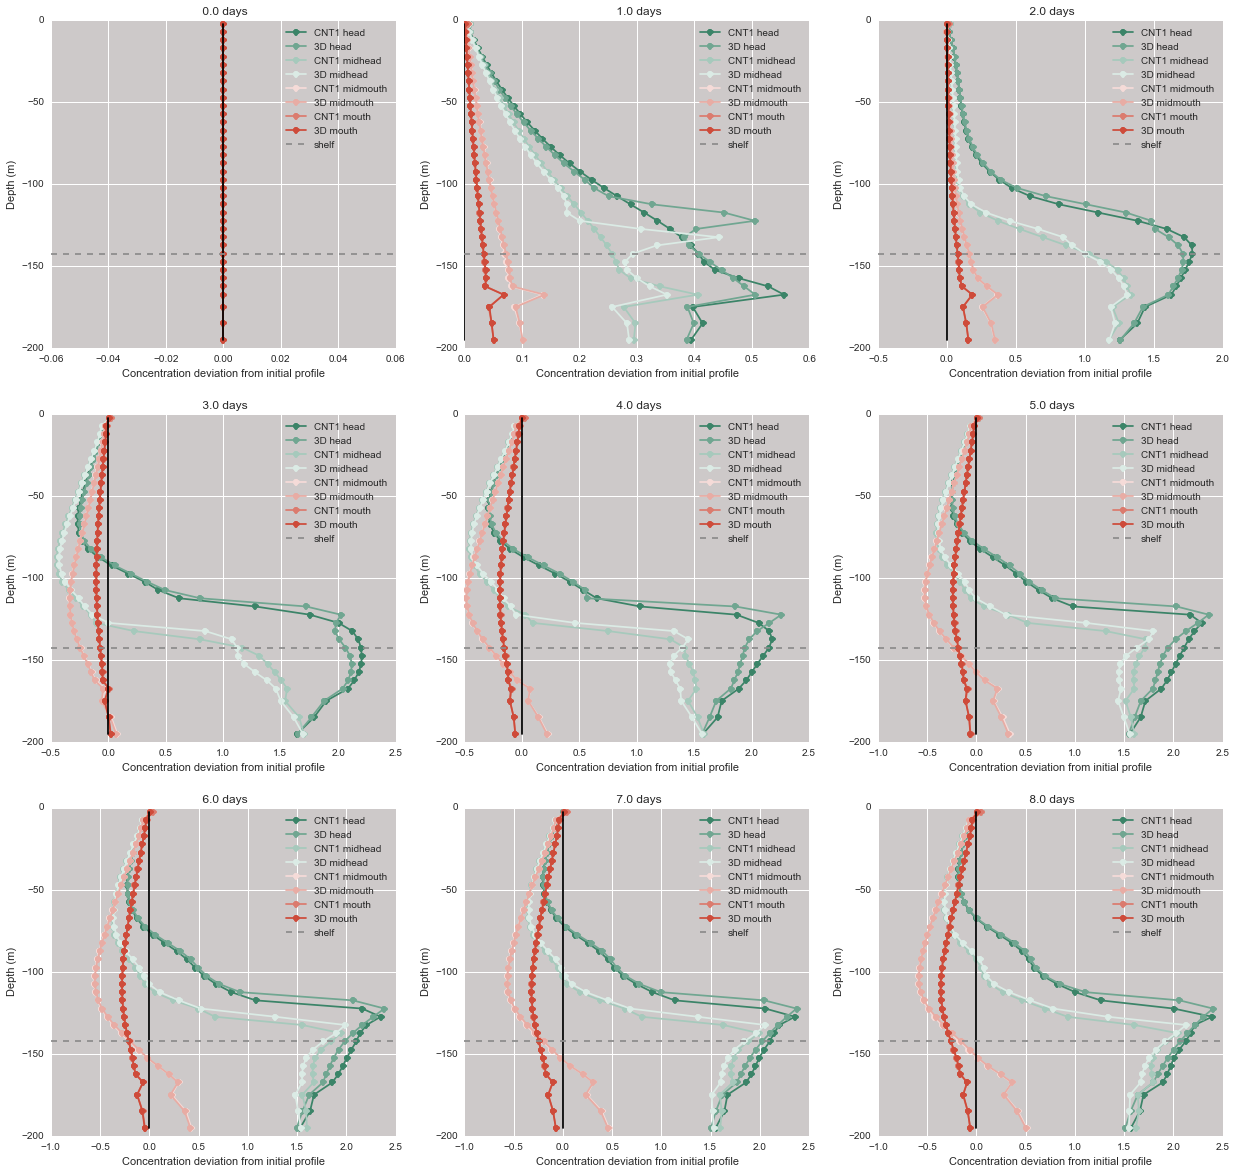

In [225]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=8, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr13Dmask=np.ma.array(Tr13D[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr1CNTmask[:37,220,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 head')
        plt.plot(Tr13Dmask[:37,220,180]-Tr13Diniprof,z[:37],'o-',label='3D head')
        
        plt.plot(Tr1CNTmask[:37,210,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 midhead')
        plt.plot(Tr13Dmask[:37,210,180]-Tr13Diniprof,z[:37],'o-',label='3D midhead')
        
        #plt.plot(Tr1CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mid')
        #plt.plot(Tr13Dmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='3D mid')
        
        plt.plot(Tr1CNTmask[:37,180,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 midmouth')
        plt.plot(Tr13Dmask[:37,180,180]-Tr13Diniprof,z[:37],'o-',label='3D midmouth')
        
        plt.plot(Tr1CNTmask[:37,160,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mouth')
        plt.plot(Tr13Dmask[:37,160,180]-Tr13Diniprof,z[:37],'o-',label='3D mouth')
        
        plt.plot(Tr13Diniprof-Tr13Diniprof,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        plt.ylabel('Depth (m)')
        plt.xlabel('Concentration deviation from initial profile')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 

52100.0


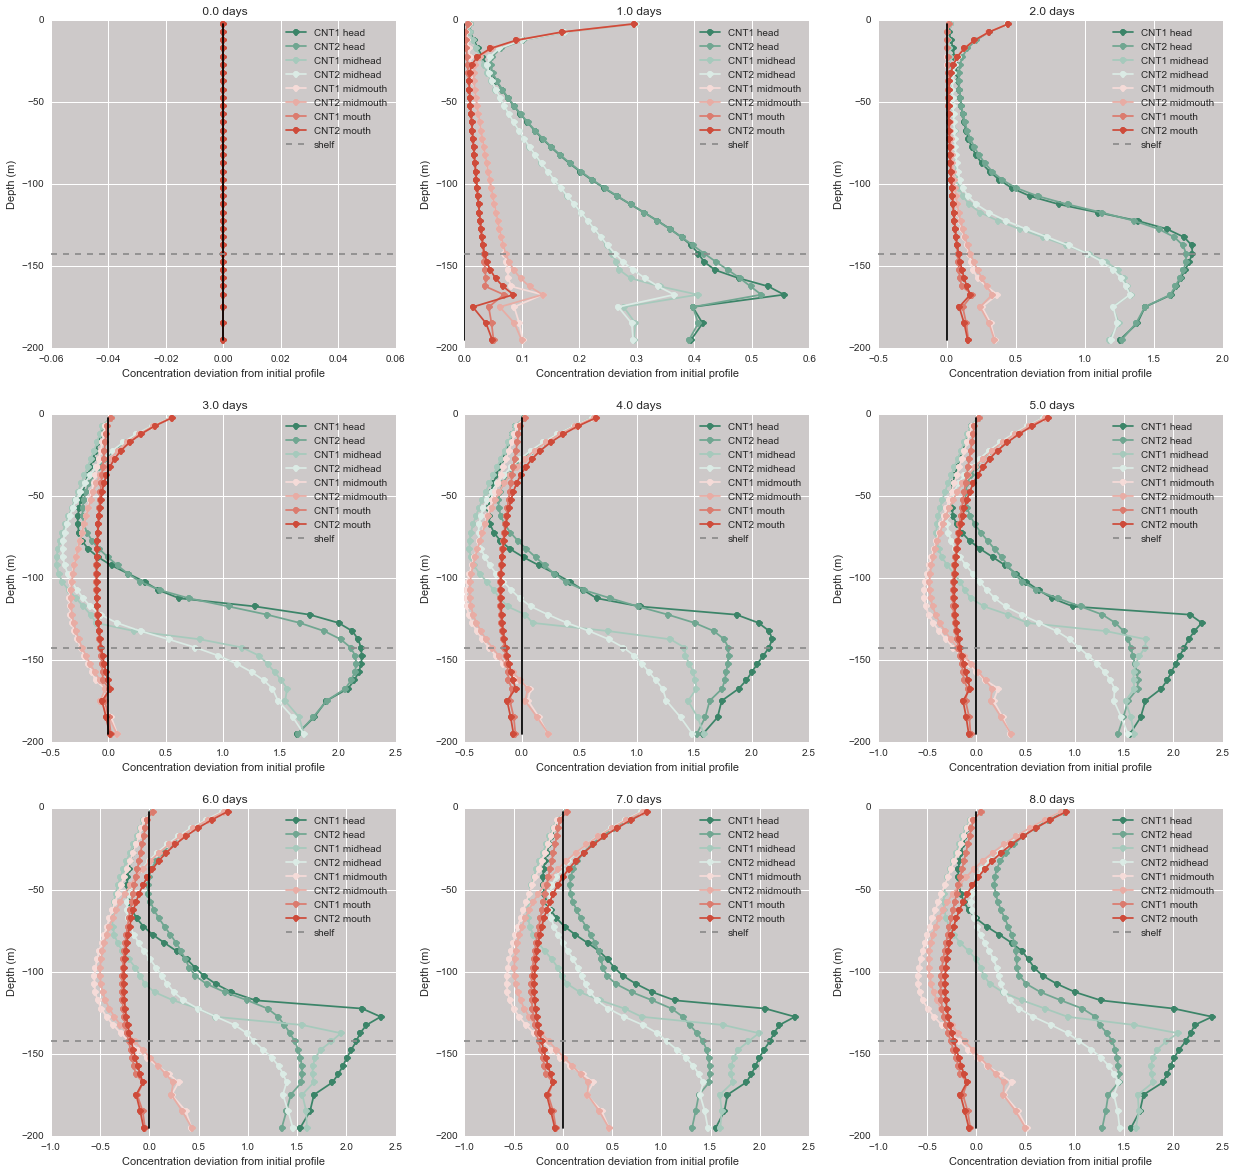

In [226]:
# Profiles
fig45=plt.figure(figsize=(21,20))
sns.set_style('darkgrid')

kk=1

Tr13Diniprof=np.ma.array(Tr13D[0,:37,200,180],mask=MaskC[:37,200,180])

with sns.diverging_palette(154, 16, n=8, center="light") :
    
    for tt in range(0,18,2) :

        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Tr1CNTmask=np.ma.array(Tr1CNT[tt,:,:,:],mask=MaskC[:,:,:])
        Tr2CNTmask=np.ma.array(Tr2CNT[tt,:,:,:],mask=MaskC[:,:,:])
        
        plt.plot(Tr1CNTmask[:37,220,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 head')
        plt.plot(Tr2CNTmask[:37,220,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 head')
        
        plt.plot(Tr1CNTmask[:37,210,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 midhead')
        plt.plot(Tr2CNTmask[:37,210,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 midhead')
        
        #plt.plot(Tr1CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mid')
        #plt.plot(Tr2CNTmask[:37,200,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 mid')
        
        plt.plot(Tr1CNTmask[:37,180,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 midmouth')
        plt.plot(Tr2CNTmask[:37,180,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 midmouth')
        
        plt.plot(Tr1CNTmask[:37,160,180]-Tr13Diniprof,z[:37],'o-',label='CNT1 mouth')
        plt.plot(Tr2CNTmask[:37,160,180]-Tr13Diniprof,z[:37],'o-',label='CNT2 mouth')
        
        plt.plot(Tr13Diniprof-Tr13Diniprof,z[:37],'-k')
        plt.axhline(y=z[28],linestyle='--', color='0.55',label='shelf')


        plt.ylabel('Depth (m)')
        plt.xlabel('Concentration deviation from initial profile')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        #labels = [40, 50, 60, 70, 80]
            #plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.legend()

        kk=kk+1
print(yc[200,0]) 